In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower, TTestIndPower
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu, wilcoxon, ranksums
from scipy.stats import fisher_exact
from scipy.stats import median_test
from scipy.stats import binomtest #for sign test

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
heart_data = pd.read_csv(url, names=column_names, na_values='?')

In [5]:
heart_data.shape

(303, 14)

In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [8]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [9]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
#replacing missing values with median
heart_data = heart_data.fillna(heart_data.median())

In [11]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
#convet target to binary(0 no disiease 1 with disease)
heart_data['target'] = heart_data['target'].apply(lambda x: 0 if x == 0 else 1)

In [13]:
#convert sex to categorical( 0= female 1= male)
heart_data['sex'] = heart_data['sex'].map({0: 'Female', 1: 'Male'})

In [14]:
heart_data.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#testing for Normality


Checking normality for key variables by heart disease status:

=== Age ===


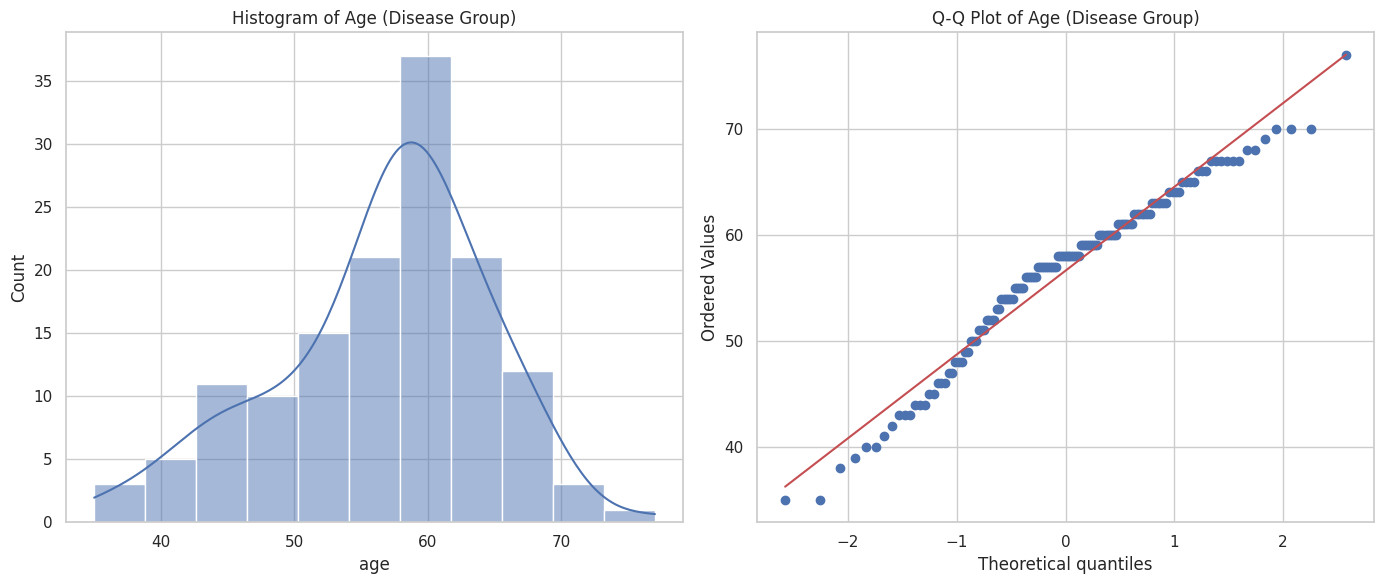

Normality Check for Age (Disease Group):
Shapiro-Wilk Test: Statistic = 0.9677, p-value = 0.002256
Conclusion: The data significantly deviates from a normal distribution (p < 0.05).
A non-parametric test may be more appropriate.


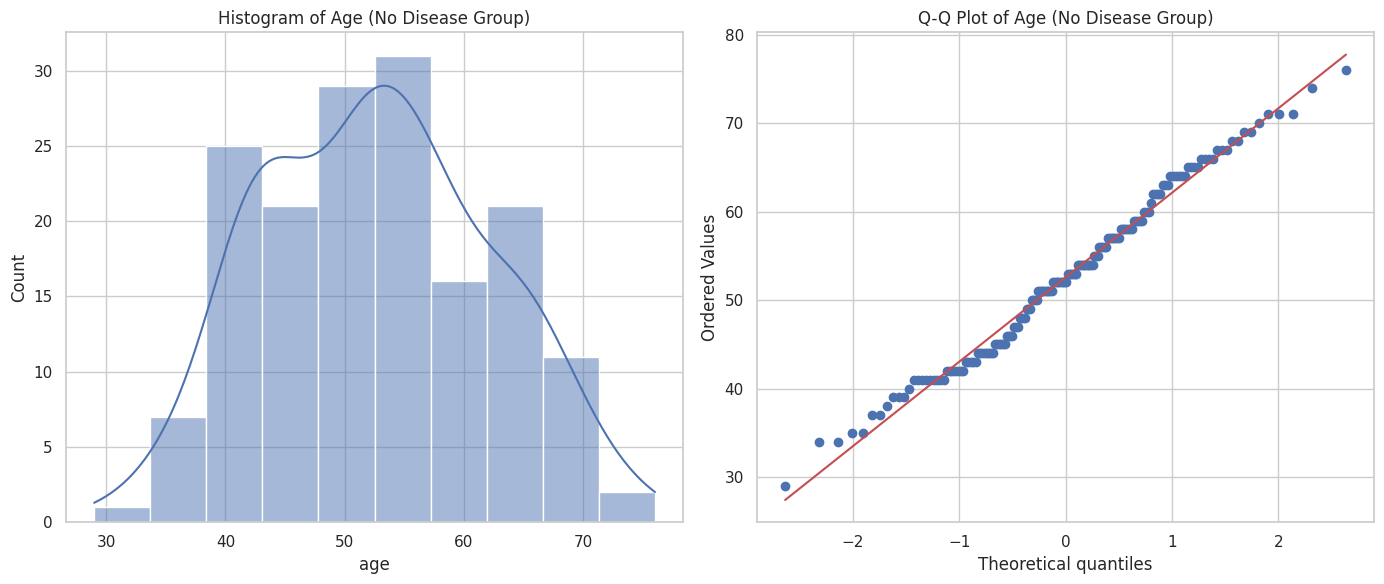

Normality Check for Age (No Disease Group):
Shapiro-Wilk Test: Statistic = 0.9870, p-value = 0.132041
Conclusion: No significant evidence against normality (p > 0.05).
A parametric test is likely appropriate.

=== Cholesterol ===


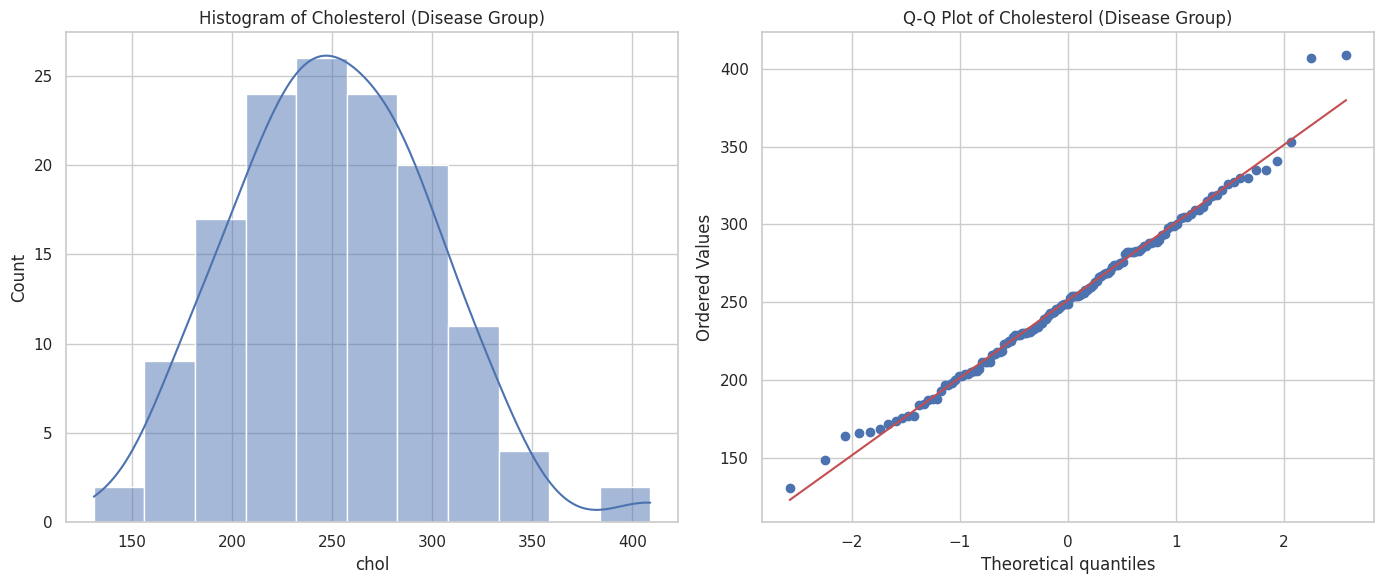

Normality Check for Cholesterol (Disease Group):
Shapiro-Wilk Test: Statistic = 0.9898, p-value = 0.402555
Conclusion: No significant evidence against normality (p > 0.05).
A parametric test is likely appropriate.


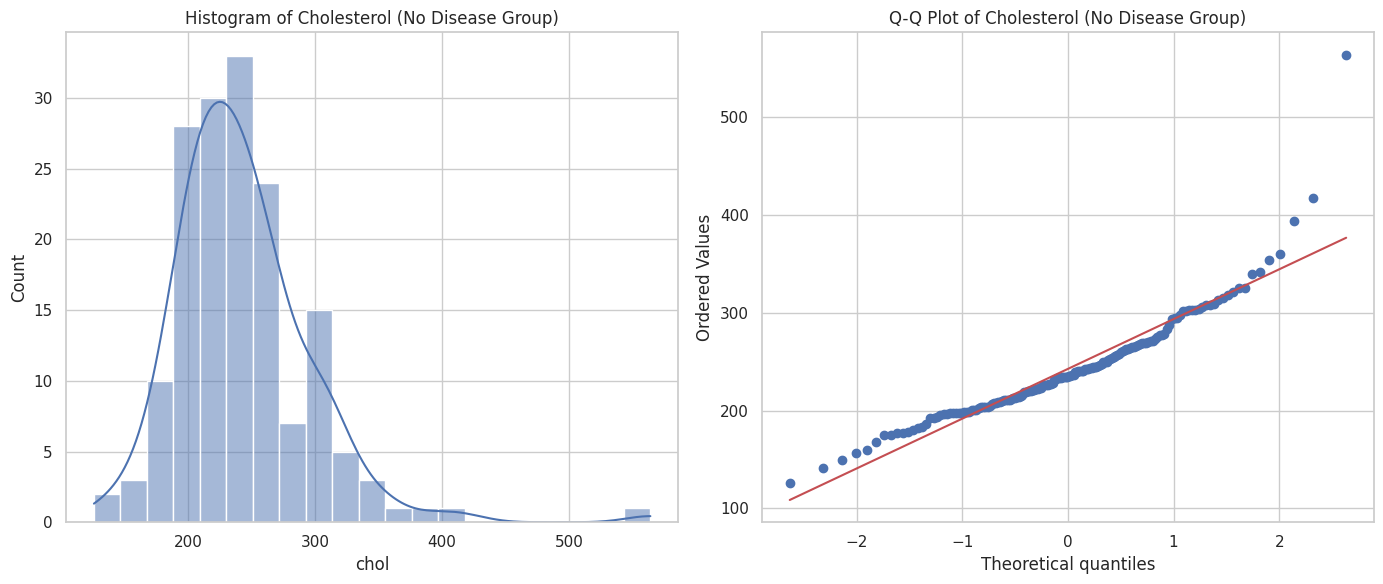

Normality Check for Cholesterol (No Disease Group):
Shapiro-Wilk Test: Statistic = 0.8973, p-value = 0.000000
Conclusion: The data significantly deviates from a normal distribution (p < 0.05).
A non-parametric test may be more appropriate.

=== Maximum Heart Rate ===


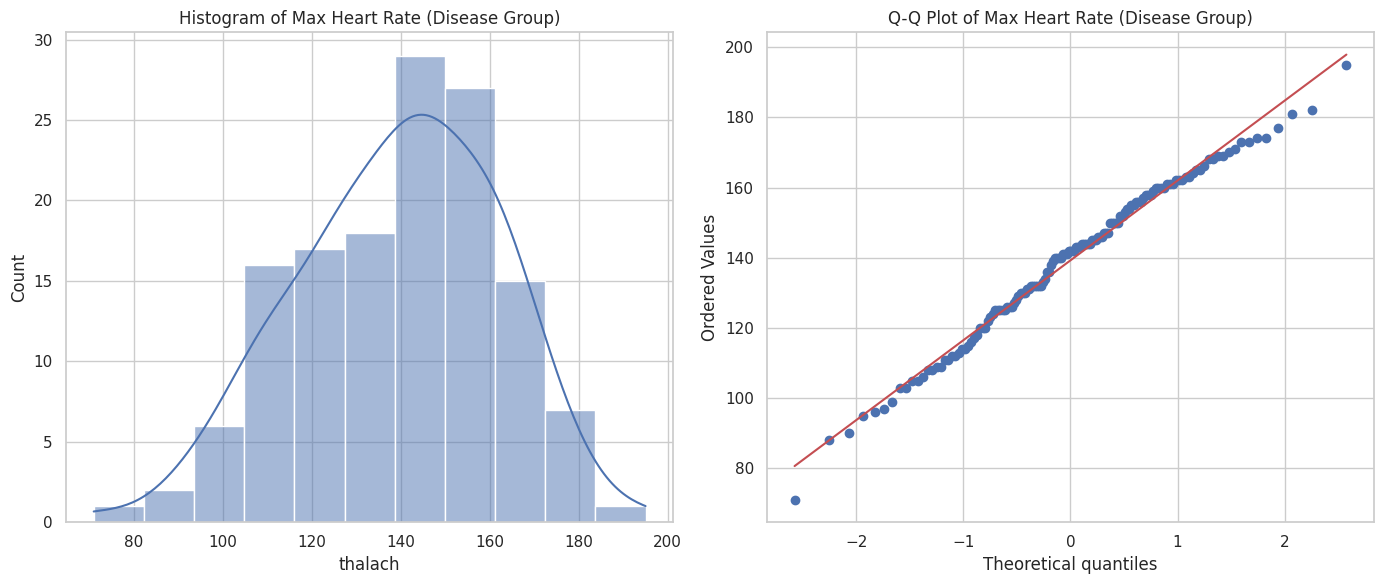

Normality Check for Max Heart Rate (Disease Group):
Shapiro-Wilk Test: Statistic = 0.9892, p-value = 0.352317
Conclusion: No significant evidence against normality (p > 0.05).
A parametric test is likely appropriate.


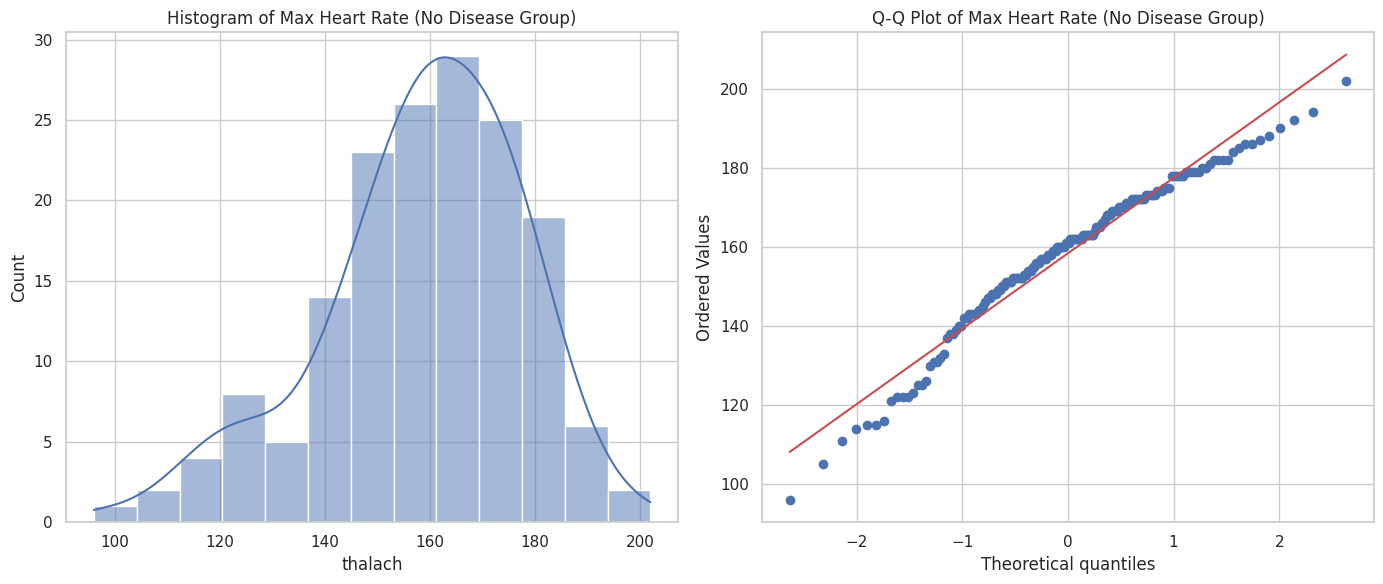

Normality Check for Max Heart Rate (No Disease Group):
Shapiro-Wilk Test: Statistic = 0.9666, p-value = 0.000543
Conclusion: The data significantly deviates from a normal distribution (p < 0.05).
A non-parametric test may be more appropriate.


np.False_

In [15]:
def check_normality(data, variable_name=None, alpha=0.05):
    """
    Check normality assumption using both visual methods and statistical tests.
    """
    if variable_name is None:
        variable_name = "Variable"

    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Histogram with normal curve
    sns.histplot(data, kde=True, ax=ax1)
    ax1.set_title(f'Histogram of {variable_name}')

    # Plot 2: Q-Q plot
    #sm.qqplot(data, line='45', ax=ax2)
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot of {variable_name}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

    ######## Perform Shapiro-Wilk test  ###############
    shapiro_stat, shapiro_p = stats.shapiro(data)

    # Print results
    print(f"Normality Check for {variable_name}:")
    print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.6f}")

    if shapiro_p < alpha:
        print(f"Conclusion: The data significantly deviates from a normal distribution (p < {alpha}).")
        print("A non-parametric test may be more appropriate.")
    else:
        print(f"Conclusion: No significant evidence against normality (p > {alpha}).")
        print("A parametric test is likely appropriate.")

    return shapiro_p > alpha  # Returns True if data appears normal

# Test normality for each group in our heart disease dataset
print("\nChecking normality for key variables by heart disease status:")

# Age by heart disease status
print("\n=== Age ===")
disease_group_age = heart_data[heart_data['target'] == 1]['age']
no_disease_group_age = heart_data[heart_data['target'] == 0]['age']
check_normality(disease_group_age, "Age (Disease Group)")
check_normality(no_disease_group_age, "Age (No Disease Group)")

# Cholesterol by heart disease status
print("\n=== Cholesterol ===")
disease_group_chol = heart_data[heart_data['target'] == 1]['chol']
no_disease_group_chol = heart_data[heart_data['target'] == 0]['chol']
check_normality(disease_group_chol, "Cholesterol (Disease Group)")
check_normality(no_disease_group_chol, "Cholesterol (No Disease Group)")

# Maximum heart rate by heart disease status
print("\n=== Maximum Heart Rate ===")
disease_group_thalach = heart_data[heart_data['target'] == 1]['thalach']
no_disease_group_thalach = heart_data[heart_data['target'] == 0]['thalach']
check_normality(disease_group_thalach, "Max Heart Rate (Disease Group)")
check_normality(no_disease_group_thalach, "Max Heart Rate (No Disease Group)")

#Mann whitney Test



Applying Mann-Whitney U Test to our dataset variables:

=== Mann-Whitney U Test for Age ===

Mann-Whitney U Test: Comparing Age (years) between 0 and 1 groups

Descriptive Statistics:
  0: n = 164, Mean = 52.59, Median = 52.00, SD = 9.51, IQR = 14.25
  1: n = 139, Mean = 56.63, Median = 58.00, SD = 7.94, IQR = 10.00

Mann-Whitney U Test Results:
  U statistic = 8274.50
  p-value = 0.000039
  Effect size r = 0.2361 (small effect)
  Result: Statistically significant difference in Age (years) between groups
  The distributions of Age (years) for 0 and 1 are significantly different


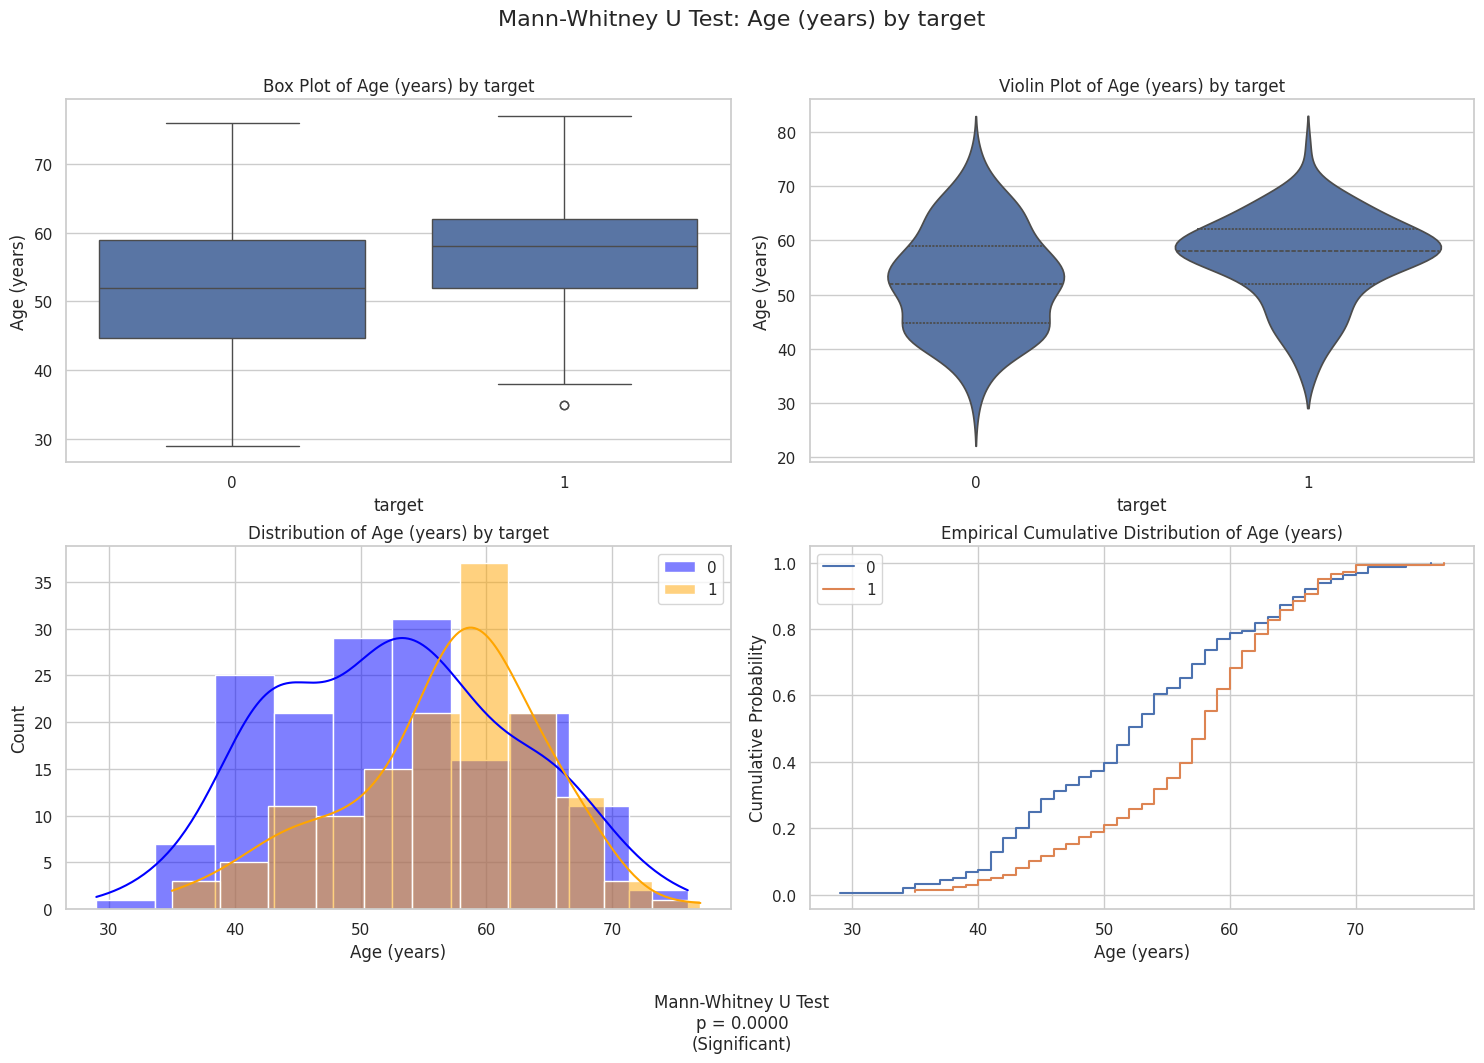


=== Mann-Whitney U Test for Cholesterol ===

Mann-Whitney U Test: Comparing Cholesterol (mg/dl) between 0 and 1 groups

Descriptive Statistics:
  0: n = 164, Mean = 242.64, Median = 234.50, SD = 53.46, IQR = 58.50
  1: n = 139, Mean = 251.47, Median = 249.00, SD = 49.49, IQR = 66.00

Mann-Whitney U Test Results:
  U statistic = 9798.50
  p-value = 0.035359
  Effect size r = 0.1209 (small effect)
  Result: Statistically significant difference in Cholesterol (mg/dl) between groups
  The distributions of Cholesterol (mg/dl) for 0 and 1 are significantly different


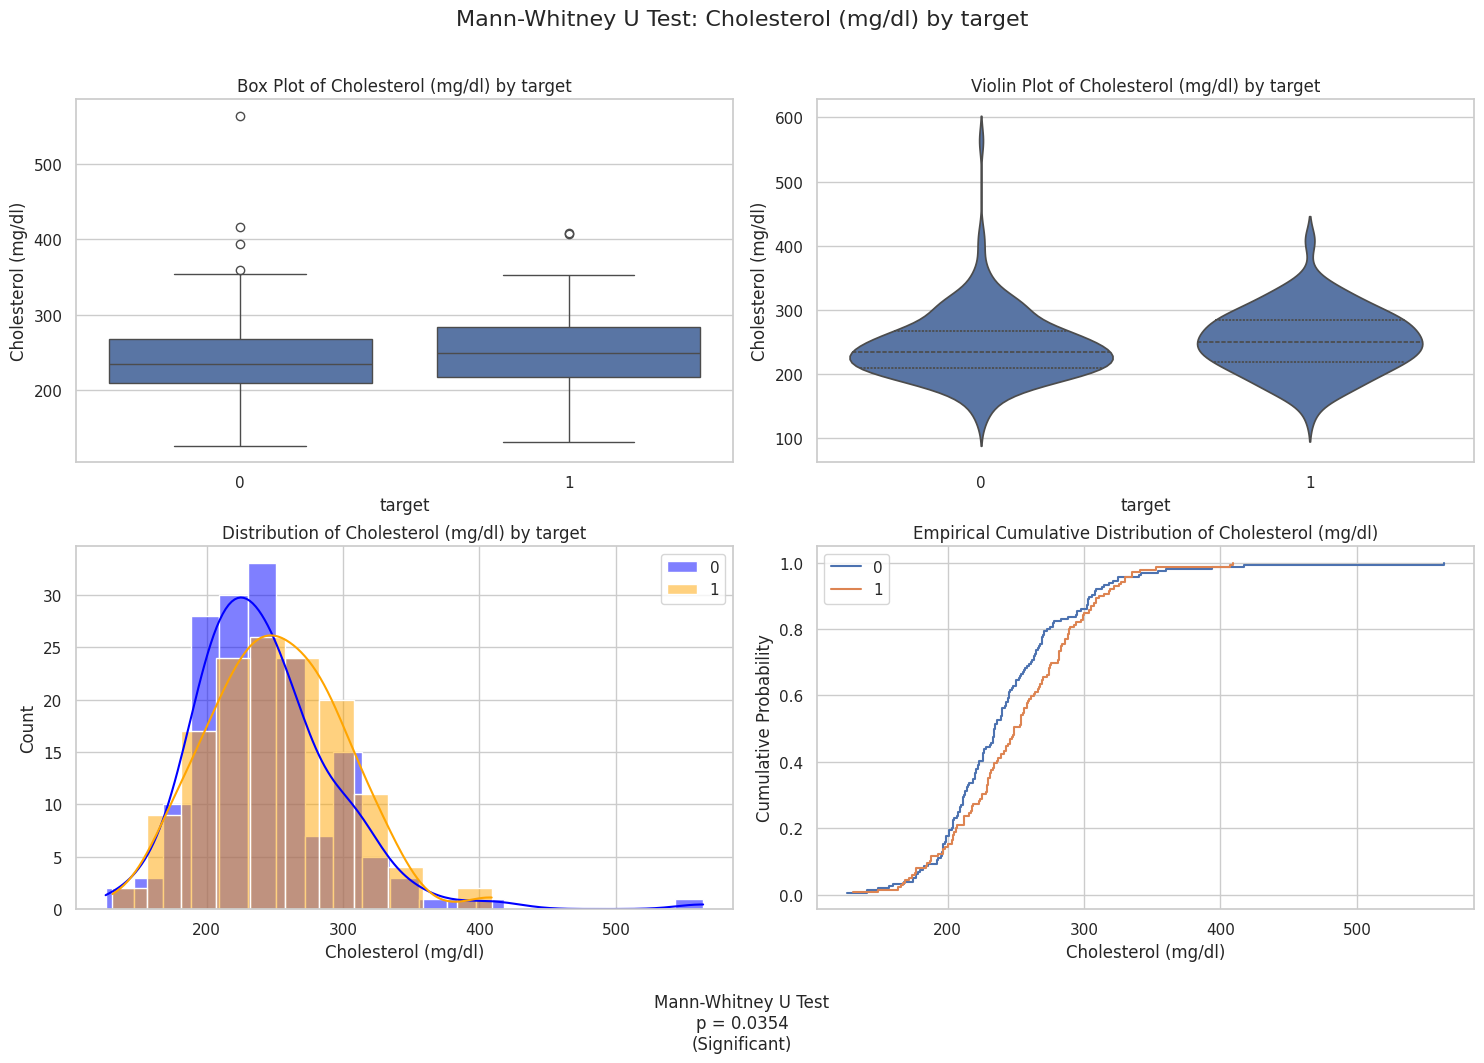


=== Mann-Whitney U Test for Maximum Heart Rate ===

Mann-Whitney U Test: Comparing Maximum Heart Rate between 0 and 1 groups

Descriptive Statistics:
  0: n = 164, Mean = 158.38, Median = 161.00, SD = 19.20, IQR = 23.25
  1: n = 139, Mean = 139.26, Median = 142.00, SD = 22.59, IQR = 31.50

Mann-Whitney U Test Results:
  U statistic = 16989.50
  p-value = 0.000000
  Effect size r = 0.4227 (medium effect)
  Result: Statistically significant difference in Maximum Heart Rate between groups
  The distributions of Maximum Heart Rate for 0 and 1 are significantly different


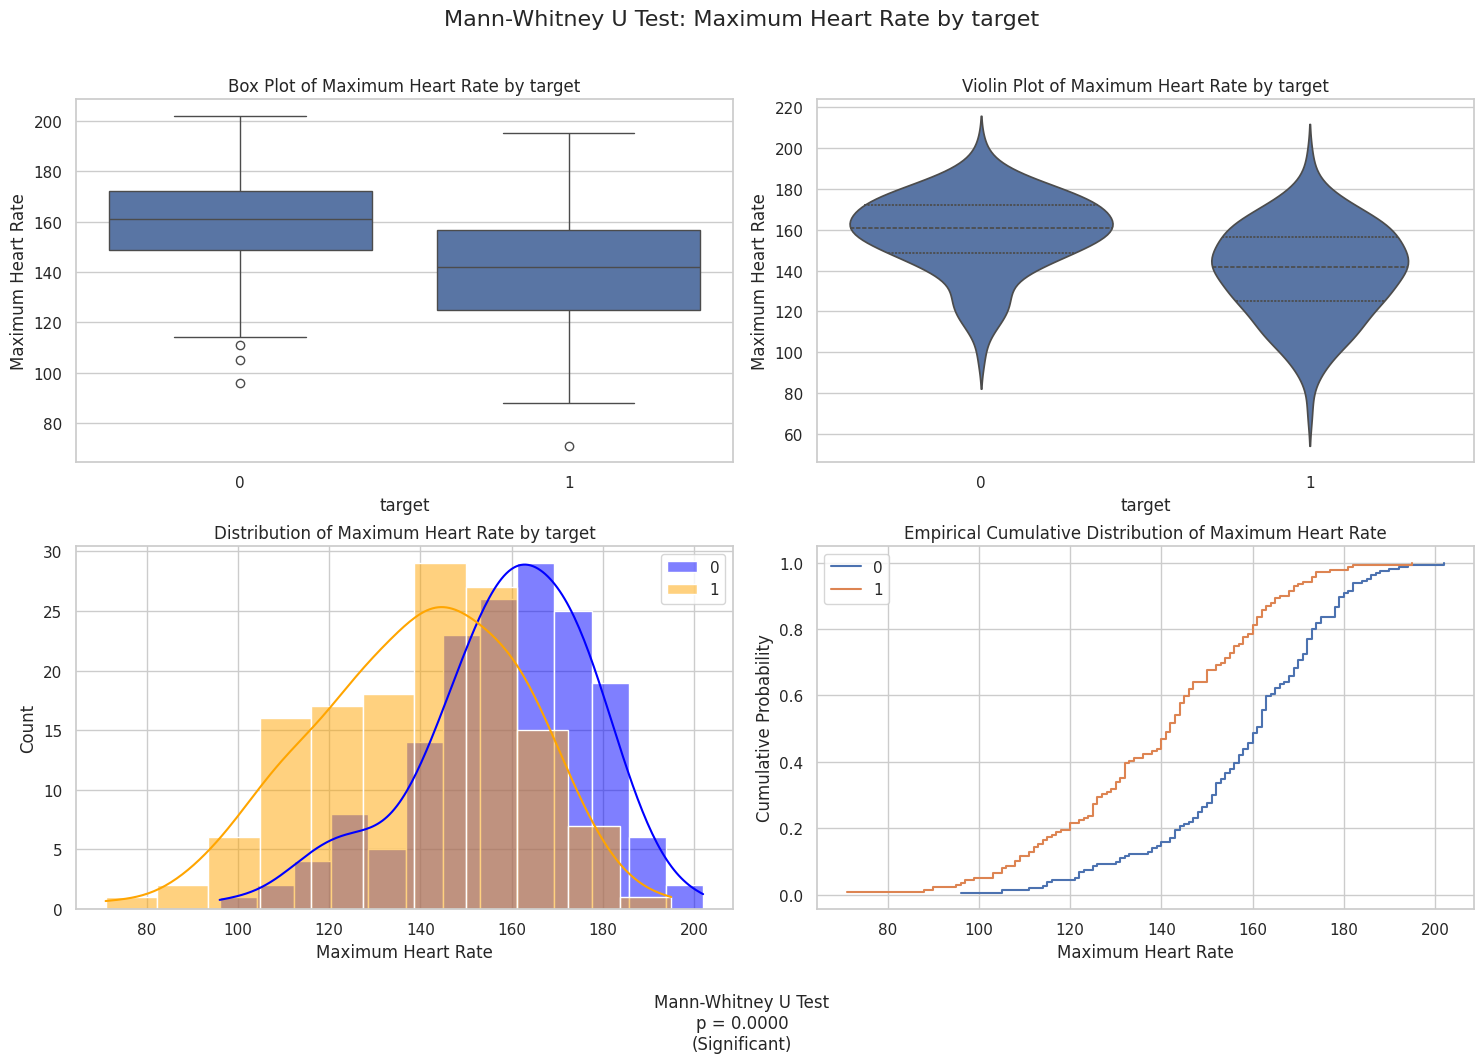


=== Mann-Whitney U Test for Resting Blood Pressure ===

Mann-Whitney U Test: Comparing Resting Blood Pressure (mm Hg) between 0 and 1 groups

Descriptive Statistics:
  0: n = 164, Mean = 129.25, Median = 130.00, SD = 16.20, IQR = 20.00
  1: n = 139, Mean = 134.57, Median = 130.00, SD = 18.77, IQR = 25.00

Mann-Whitney U Test Results:
  U statistic = 9710.00
  p-value = 0.025972
  Effect size r = 0.1276 (small effect)
  Result: Statistically significant difference in Resting Blood Pressure (mm Hg) between groups
  The distributions of Resting Blood Pressure (mm Hg) for 0 and 1 are significantly different


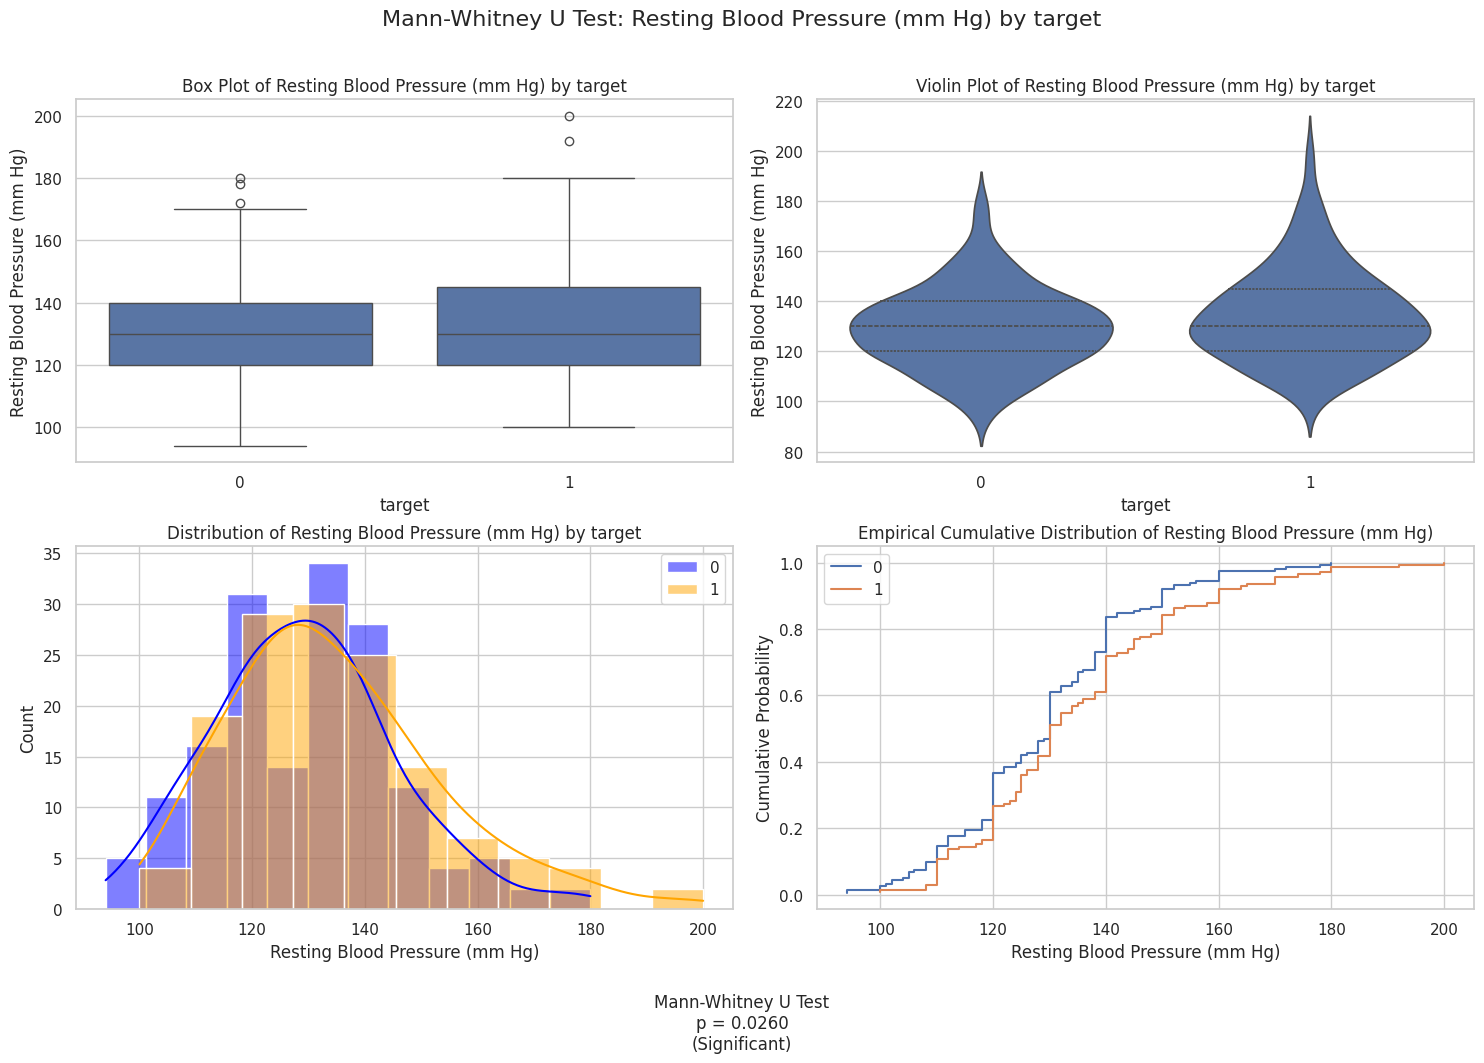

In [17]:
def perform_mannwhitney_test(data, group_var, test_var, display_name=None):

    if display_name is None:
        display_name = test_var

    # Ensure the data has only two groups e.g., non heart disease and with heart disease
    group_values = data[group_var].unique()
    if len(group_values) != 2:
        print(f"Error: {group_var} must have exactly 2 unique values for Mann-Whitney test.")
        return

    group1 = data[data[group_var] == group_values[0]][test_var].dropna()  #In our case these would be no heart disease - 164 data points
    group2 = data[data[group_var] == group_values[1]][test_var].dropna()  # with heart disease - 139 data points

    # Calculate descriptive statistics for each group
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = group1.mean(), group2.mean()
    median1, median2 = group1.median(), group2.median()
    std1, std2 = group1.std(), group2.std()
    iqr1 = group1.quantile(0.75) - group1.quantile(0.25)
    iqr2 = group2.quantile(0.75) - group2.quantile(0.25)

    print(f"\nMann-Whitney U Test: Comparing {display_name} between {group_values[0]} and {group_values[1]} groups")
    print(f"\nDescriptive Statistics:")
    print(f"  {group_values[0]}: n = {n1}, Mean = {mean1:.2f}, Median = {median1:.2f}, SD = {std1:.2f}, IQR = {iqr1:.2f}")
    print(f"  {group_values[1]}: n = {n2}, Mean = {mean2:.2f}, Median = {median2:.2f}, SD = {std2:.2f}, IQR = {iqr2:.2f}")

    # Perform Mann-Whitney U test
    # Note: 'alternative' parameter set to 'two-sided' for a two-tailed test
    u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    # Calculate effect size (r = Z / sqrt(N))
    # Convert U to Z score for the effect size calculation
    n_total = n1 + n2
    mean_u = (n1 * n2) / 2
    std_u = np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
    z_score = (u_stat - mean_u) / std_u
    effect_size_r = abs(z_score) / np.sqrt(n_total)

    # Interpret effect size
    if effect_size_r < 0.1:
        effect_interpretation = "negligible"
    elif effect_size_r < 0.3:
        effect_interpretation = "small"
    elif effect_size_r < 0.5:
        effect_interpretation = "medium"
    else:
        effect_interpretation = "large"

    # Print Mann-Whitney U test results
    print("\nMann-Whitney U Test Results:")
    print(f"  U statistic = {u_stat:.2f}")
    print(f"  p-value = {p_value:.6f}")
    print(f"  Effect size r = {effect_size_r:.4f} ({effect_interpretation} effect)")

    # Print interpretation
    if p_value < 0.05:
        print(f"  Result: Statistically significant difference in {display_name} between groups")
        print(f"  The distributions of {display_name} for {group_values[0]} and {group_values[1]} are significantly different")
    else:
        print(f"  Result: No statistically significant difference in {display_name} between groups")
        print(f"  No evidence that the distributions of {display_name} differ between {group_values[0]} and {group_values[1]}")

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # 1. Box plots
    plt.subplot(2, 2, 1)
    sns.boxplot(x=group_var, y=test_var, data=data)
    plt.title(f'Box Plot of {display_name} by {group_var}')
    plt.ylabel(display_name)

    # 2. Violin plots
    plt.subplot(2, 2, 2)
    sns.violinplot(x=group_var, y=test_var, data=data, inner='quartile')
    plt.title(f'Violin Plot of {display_name} by {group_var}')
    plt.ylabel(display_name)

    # 3. Overlapping histograms
    plt.subplot(2, 2, 3)
    sns.histplot(group1, color='blue', alpha=0.5, label=group_values[0], kde=True)
    sns.histplot(group2, color='orange', alpha=0.5, label=group_values[1], kde=True)
    plt.title(f'Distribution of {display_name} by {group_var}')
    plt.xlabel(display_name)
    plt.legend()

    # 4. Emperical Cumulative distribution function (ECDF) plot - useful for Mann-Whitney U test
    plt.subplot(2, 2, 4)

    # Calculate ECDF for each group
    def ecdf(x):
        # Count the proportion of values less than or equal to each value
        x = np.sort(x)
        y = np.arange(1, len(x) + 1) / len(x)
        return x, y

    x1, y1 = ecdf(group1)
    x2, y2 = ecdf(group2)

    plt.step(x1, y1, label=group_values[0], where='post')
    plt.step(x2, y2, label=group_values[1], where='post')

    plt.title(f'Empirical Cumulative Distribution of {display_name}')
    plt.xlabel(display_name)
    plt.ylabel('Cumulative Probability')
    plt.legend()

    # Add p-value annotation to the plot
    sig_text = f"Mann-Whitney U Test\np = {p_value:.4f}"
    if p_value < 0.05:
        sig_text += "\n(Significant)"
    else:
        sig_text += "\n(Not Significant)"

    plt.figtext(0.5, 0.01, sig_text, ha='center', fontsize=12,
                bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.suptitle(f'Mann-Whitney U Test: {display_name} by {group_var}', fontsize=16, y=1.05)
    plt.show()

    # Return results for further analysis if needed
    return {
        'u_statistic': u_stat,
        'p_value': p_value,
        'effect_size_r': effect_size_r,
        'n1': n1,
        'n2': n2
    }

# Apply the Mann-Whitney U test to our heart disease dataset variables
print("\n\nApplying Mann-Whitney U Test to our dataset variables:")

# Analyze age differences between heart disease and no heart disease groups
print("\n=== Mann-Whitney U Test for Age ===")
age_mw_results = perform_mannwhitney_test(heart_data, 'target', 'age', 'Age (years)')

# Analyze cholesterol differences between heart disease and no heart disease groups
print("\n=== Mann-Whitney U Test for Cholesterol ===")
chol_mw_results = perform_mannwhitney_test(heart_data, 'target', 'chol', 'Cholesterol (mg/dl)')

# Analyze maximum heart rate differences between heart disease and no heart disease groups
print("\n=== Mann-Whitney U Test for Maximum Heart Rate ===")
hr_mw_results = perform_mannwhitney_test(heart_data, 'target', 'thalach', 'Maximum Heart Rate')

# Compare resting blood pressure differences
print("\n=== Mann-Whitney U Test for Resting Blood Pressure ===")
bp_mw_results = perform_mannwhitney_test(heart_data, 'target', 'trestbps', 'Resting Blood Pressure (mm Hg)')

#wilcoson Signed Rank test



Wilcoxon Signed-Rank Test with Simulated Blood Pressure Data:

=== Scenario 1: Moderate Treatment Effect ===

Checking symmetry assumption for the differences in blood_pressure:
  Kolmogorov-Smirnov test p-value for symmetry: 0.0115
  Consider using the Sign Test instead of Wilcoxon signed-rank test.

Wilcoxon Signed-Rank Test Results:
  Comparing Blood Pressure (mmHg) - Moderate Effect before and after
  Before: Mean = 138.44, Median = 138.10, SD = 13.62
  After: Mean = 133.50, Median = 133.60, SD = 13.50
  Mean difference (After - Before): -4.95
  Median difference (After - Before): -4.49, 95% CI [-5.19, -4.38]
  Wilcoxon statistic = 14.00, p-value = 0.0000
  Effect size r = 0.8634 (large effect)
  Result: Statistically significant change in Blood Pressure (mmHg) - Moderate Effect


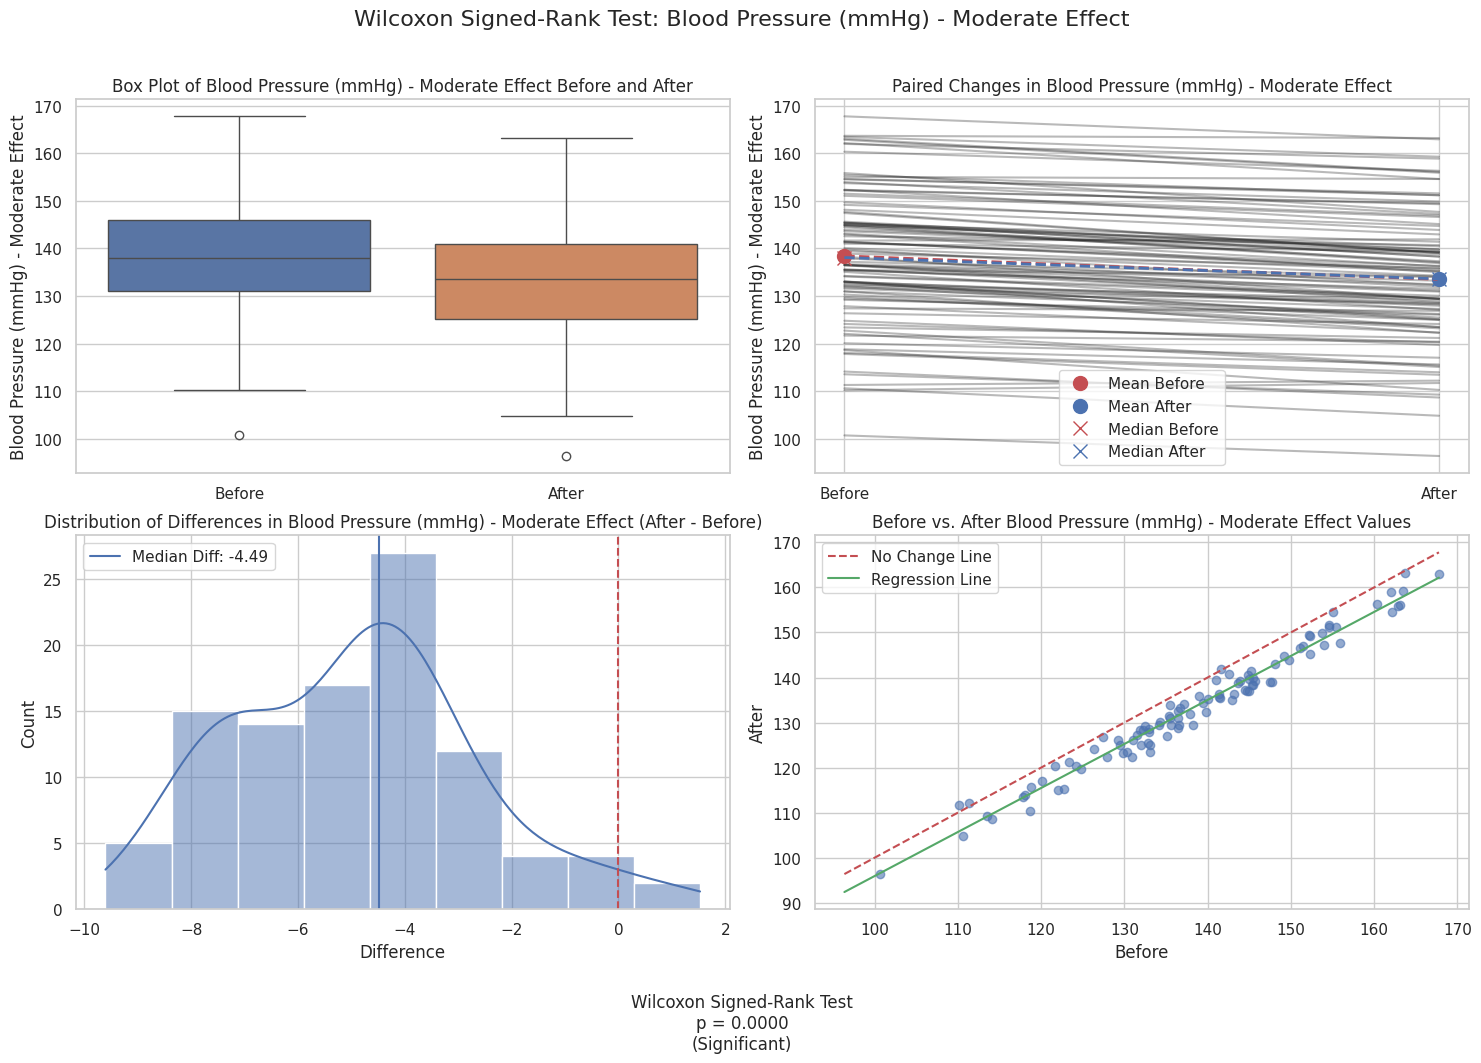


=== Scenario 2: Small Treatment Effect ===

Checking symmetry assumption for the differences in blood_pressure:
  Kolmogorov-Smirnov test p-value for symmetry: 0.5487
  The distribution of differences appears to be symmetric.

Wilcoxon Signed-Rank Test Results:
  Comparing Blood Pressure (mmHg) - Small Effect before and after
  Before: Mean = 140.97, Median = 141.47, SD = 16.26
  After: Mean = 139.40, Median = 139.78, SD = 16.64
  Mean difference (After - Before): -1.57
  Median difference (After - Before): -1.68, 95% CI [-2.46, -0.76]
  Wilcoxon statistic = 1327.00, p-value = 0.0000
  Effect size r = 0.4119 (medium effect)
  Result: Statistically significant change in Blood Pressure (mmHg) - Small Effect


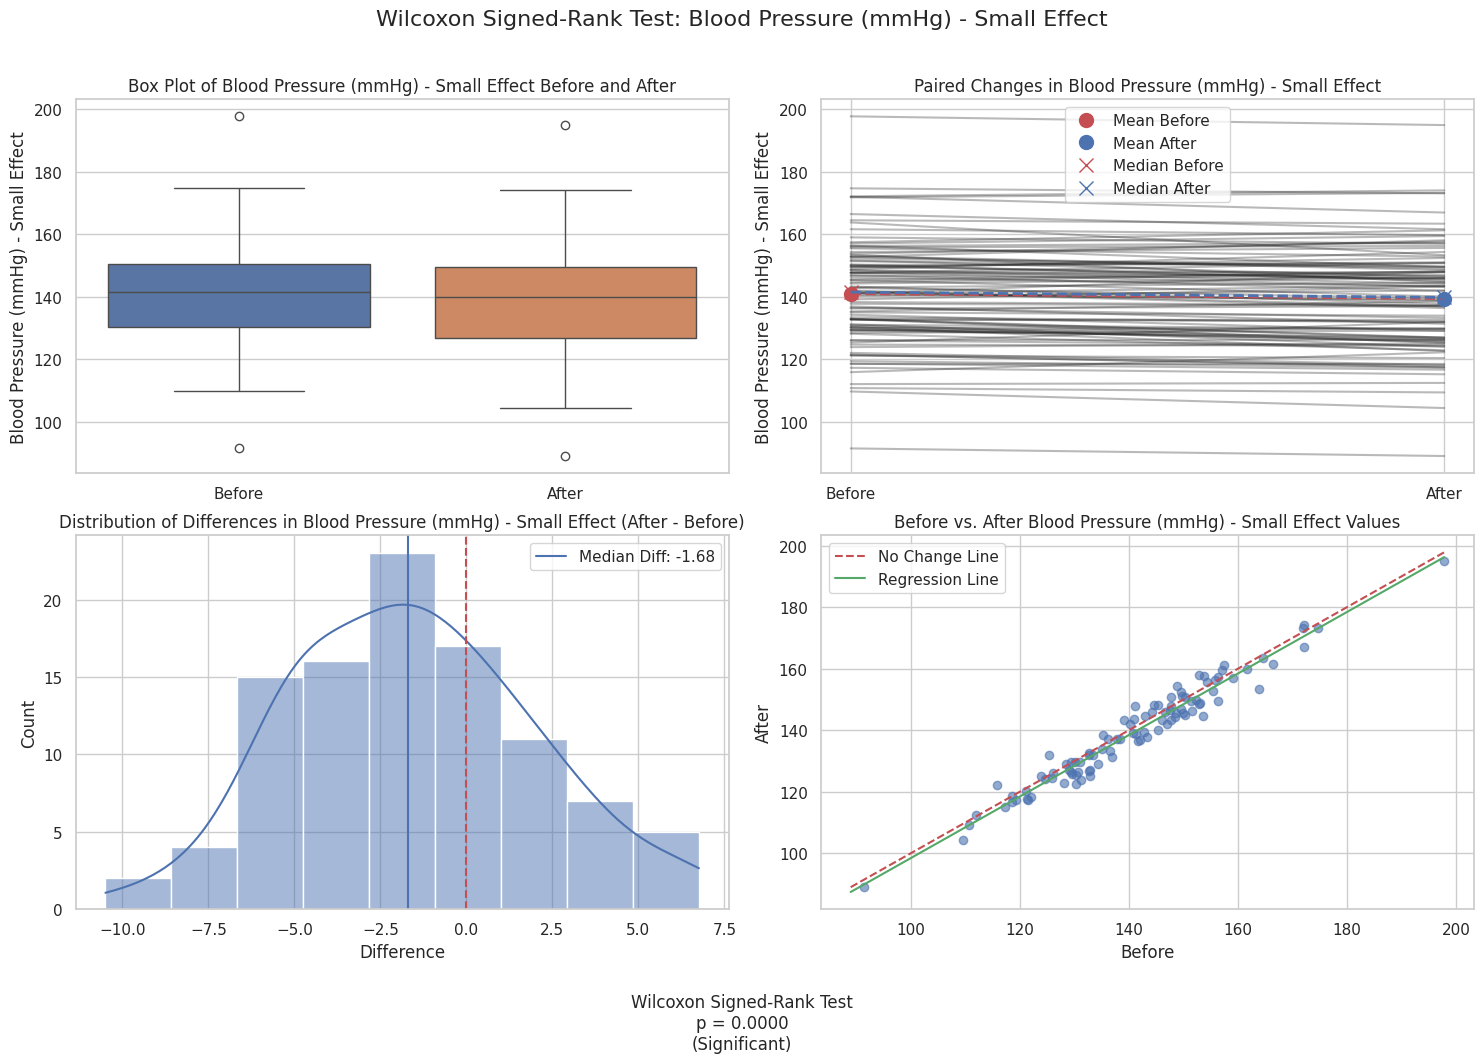

In [18]:
def perform_wilcoxon_test(before_data, after_data, var_name, display_name=None):

    if display_name is None:
        display_name = var_name

    # Make sure data is of equal length
    if len(before_data) != len(after_data):
        print("Error: Before and after data must have the same length")
        return

    # Calculate differences
    diff = after_data - before_data

    # Check whether differences are symmetric around the median
    # This is an assumption of the Wilcoxon signed-rank test
    print(f"\nChecking symmetry assumption for the differences in {var_name}:")

    # Calculate the median of the differences
    median_diff = np.median(diff)

    # Calculate distances from the median
    distances = np.abs(diff - median_diff)

    # Split the data into values above and below the median
    above_median = distances[diff > median_diff]
    below_median = distances[diff < median_diff]

    # Use Kolmogorov-Smirnov test to check if distributions are similar
    if len(above_median) > 0 and len(below_median) > 0:  # Check to avoid empty arrays
        _, p_ks = stats.ks_2samp(above_median, below_median)
        print(f"  Kolmogorov-Smirnov test p-value for symmetry: {p_ks:.4f}")

        if p_ks < 0.05:
            print("  Warning: The distribution of differences may not be symmetric.")
            print("  Consider using the Sign Test instead of Wilcoxon signed-rank test.")
        else:
            print("  The distribution of differences appears to be symmetric.")
    else:
        print("  Cannot test symmetry: too many identical values.")

    # Perform the Wilcoxon signed-rank test
    try:
        # Only include non-zero differences in the test
        # (Wilcoxon test discards pairs with no differences)
        non_zero_diff = diff[diff != 0]
        if len(non_zero_diff) < 6:  # Generally need at least 6 pairs with non-zero differences
            print(f"  Warning: Only {len(non_zero_diff)} non-zero differences found.")
            print("  Wilcoxon test may have low power. Consider collecting more data.")

        stat, p_value = wilcoxon(before_data, after_data, alternative='two-sided')

        # Calculate descriptive statistics
        mean_before, std_before = np.mean(before_data), np.std(before_data, ddof=1)
        mean_after, std_after = np.mean(after_data), np.std(after_data, ddof=1)
        mean_diff = mean_after - mean_before
        median_before, median_after = np.median(before_data), np.median(after_data)
        median_diff = median_after - median_before
        n = len(before_data)
        n_nonzero = len(non_zero_diff)

        # Calculate effect size (r = Z / sqrt(N))
        # Convert Wilcoxon statistic to Z-score
        z = (stat - (n_nonzero * (n_nonzero + 1)) / 4) / np.sqrt((n_nonzero * (n_nonzero + 1) * (2 * n_nonzero + 1)) / 24)
        effect_size_r = abs(z) / np.sqrt(n)

        # Interpret effect size
        if effect_size_r < 0.1:
            effect_interpretation = "negligible"
        elif effect_size_r < 0.3:
            effect_interpretation = "small"
        elif effect_size_r < 0.5:
            effect_interpretation = "medium"
        else:
            effect_interpretation = "large"

        # Calculate 95% confidence interval for the median difference
        # This is a more robust approach than using mean differences
        alpha = 0.05
        sorted_diff = np.sort(diff)

        # Calculate ranks for confidence interval
        # Based on the binomial distribution for the sign test
        lower_rank = int(np.ceil((n - 1.96 * np.sqrt(n)) / 2))
        upper_rank = int(np.ceil((n + 1.96 * np.sqrt(n)) / 2))

        # Ensure ranks are within bounds
        lower_rank = max(0, lower_rank)
        upper_rank = min(n - 1, upper_rank)

        # Get confidence interval values
        if n > 0:
            ci_lower = sorted_diff[lower_rank]
            ci_upper = sorted_diff[upper_rank]
        else:
            ci_lower, ci_upper = np.nan, np.nan

        # Print results
        print("\nWilcoxon Signed-Rank Test Results:")
        print(f"  Comparing {display_name} before and after")
        print(f"  Before: Mean = {mean_before:.2f}, Median = {median_before:.2f}, SD = {std_before:.2f}")
        print(f"  After: Mean = {mean_after:.2f}, Median = {median_after:.2f}, SD = {std_after:.2f}")
        print(f"  Mean difference (After - Before): {mean_diff:.2f}")
        print(f"  Median difference (After - Before): {median_diff:.2f}, 95% CI [{ci_lower:.2f}, {ci_upper:.2f}]")
        print(f"  Wilcoxon statistic = {stat:.2f}, p-value = {p_value:.4f}")
        print(f"  Effect size r = {effect_size_r:.4f} ({effect_interpretation} effect)")

        if p_value < 0.05:
            print(f"  Result: Statistically significant change in {display_name}")
        else:
            print(f"  Result: No statistically significant change in {display_name}")

        # Create visualizations
        plt.figure(figsize=(15, 10))

        # 1. Box plots
        plt.subplot(2, 2, 1)
        box_data = pd.DataFrame({
            'Before': before_data,
            'After': after_data
        })
        sns.boxplot(data=box_data)
        plt.title(f'Box Plot of {display_name} Before and After')
        plt.ylabel(display_name)

        # 2. Paired line plot
        plt.subplot(2, 2, 2)
        for i in range(n):
            plt.plot([1, 2], [before_data[i], after_data[i]], 'k-', alpha=0.3)

        # Add mean points
        plt.plot(1, mean_before, 'ro', markersize=10, label='Mean Before')
        plt.plot(2, mean_after, 'bo', markersize=10, label='Mean After')

        # Connect means
        plt.plot([1, 2], [mean_before, mean_after], 'r--', linewidth=2)

        # Add median points
        plt.plot(1, median_before, 'rx', markersize=10, label='Median Before')
        plt.plot(2, median_after, 'bx', markersize=10, label='Median After')

        # Connect medians (important for Wilcoxon test)
        plt.plot([1, 2], [median_before, median_after], 'b--', linewidth=2)

        plt.xticks([1, 2], ['Before', 'After'])
        plt.title(f'Paired Changes in {display_name}')
        plt.ylabel(display_name)
        plt.legend()

        # 3. Histogram of differences
        plt.subplot(2, 2, 3)
        sns.histplot(diff, kde=True)
        plt.axvline(0, color='r', linestyle='--')
        plt.axvline(median_diff, color='b', linestyle='-', label=f'Median Diff: {median_diff:.2f}')
        plt.title(f'Distribution of Differences in {display_name} (After - Before)')
        plt.xlabel('Difference')
        plt.legend()

        # 4. Scatter plot of before vs after values
        plt.subplot(2, 2, 4)
        plt.scatter(before_data, after_data, alpha=0.6)

        # Add diagonal line (no change line)
        min_val = min(np.min(before_data), np.min(after_data))
        max_val = max(np.max(before_data), np.max(after_data))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='No Change Line')

        # Add regression line
        slope, intercept = np.polyfit(before_data, after_data, 1)
        plt.plot([min_val, max_val], [slope*min_val + intercept, slope*max_val + intercept], 'g-', label='Regression Line')

        plt.xlabel('Before')
        plt.ylabel('After')
        plt.title(f'Before vs. After {display_name} Values')
        plt.legend()

        # Add p-value annotation to the plot
        sig_text = f"Wilcoxon Signed-Rank Test\np = {p_value:.4f}"
        if p_value < 0.05:
            sig_text += "\n(Significant)"
        else:
            sig_text += "\n(Not Significant)"

        plt.figtext(0.5, 0.01, sig_text, ha='center', fontsize=12,
                    bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})

        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)
        plt.suptitle(f'Wilcoxon Signed-Rank Test: {display_name}', fontsize=16, y=1.05)
        plt.show()

        # Return the results for further analysis if needed
        return {
            'wilcoxon_statistic': stat,
            'p_value': p_value,
            'effect_size_r': effect_size_r,
            'mean_difference': mean_diff,
            'median_difference': median_diff,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'n': n
        }
    except Exception as e:
        print(f"Error performing Wilcoxon test: {e}")
        print("This can happen if all differences are zero or if there are too few samples.")
        return None

# Since we don't have paired data in our heart disease dataset, we'll simulate blood pressure data
# for demonstration purposes
print("\n\nWilcoxon Signed-Rank Test with Simulated Blood Pressure Data:")

# Set random seed for reproducibility
np.random.seed(42)

# Two scenarios for demonstration: moderate effect and small effect
print("\n=== Scenario 1: Moderate Treatment Effect ===")
num_patients = 100
# Simulate before data with mean 140 and SD 15
bp_before1 = np.random.normal(140, 15, num_patients)

# Simulate a moderate treatment effect: decrease of ~5 mmHg on average
true_effect1 = -5  # desired average decrease
noise_sd1 = 8      # realistic post-treatment variation
correlation1 = 0.7  # strong correlation for paired data

# Add noise correlated with the before values
random_noise1 = np.random.normal(0, noise_sd1, num_patients)
bp_after1 = bp_before1 + true_effect1 + (1 - correlation1) * random_noise1

# Run the Wilcoxon signed-rank test on the simulated blood pressure data with moderate effect
bp_wilcoxon_results1 = perform_wilcoxon_test(bp_before1, bp_after1, 'blood_pressure', 'Blood Pressure (mmHg) - Moderate Effect')

print("\n=== Scenario 2: Small Treatment Effect ===")
# Simulate a small treatment effect: decrease of ~2 mmHg on average
true_effect2 = -2  # smaller average decrease
noise_sd2 = 10     # more post-treatment variation
correlation2 = 0.6  # moderate correlation for paired data

# Add noise correlated with the before values
bp_before2 = np.random.normal(140, 15, num_patients)  # same baseline
random_noise2 = np.random.normal(0, noise_sd2, num_patients)
bp_after2 = bp_before2 + true_effect2 + (1 - correlation2) * random_noise2

# Run the Wilcoxon signed-rank test on the simulated blood pressure data with small effect
bp_wilcoxon_results2 = perform_wilcoxon_test(bp_before2, bp_after2, 'blood_pressure', 'Blood Pressure (mmHg) - Small Effect')

#Sign Test

In [19]:
def perform_sign_test(before_data, after_data, var_name, display_name=None):

    if display_name is None:
        display_name = var_name

    # Make sure data is of equal length
    if len(before_data) != len(after_data):
        print("Error: Before and after data must have the same length")
        return

    # Calculate differences
    diff = after_data - before_data

    # Get signs of differences (positive, negative, zero)
    pos_count = np.sum(diff > 0)
    neg_count = np.sum(diff < 0)
    zero_count = np.sum(diff == 0)

    # Total non-zero differences
    n_nonzero = pos_count + neg_count

    print(f"\nSign Test Results for {display_name}:")
    print(f"  Number of positive differences: {pos_count}")
    print(f"  Number of negative differences: {neg_count}")
    print(f"  Number of zero differences: {zero_count}")

    if n_nonzero < 10:
        print("  Warning: Small sample size. The sign test has low power with fewer than 10 non-zero differences.")

    # Calculate descriptive statistics
    mean_before = np.mean(before_data)
    mean_after = np.mean(after_data)
    mean_diff = mean_after - mean_before

    median_before = np.median(before_data)
    median_after = np.median(after_data)
    median_diff = median_after - median_before

    # Perform the sign test using binomial test
    # Under the null hypothesis, we expect equal numbers of positive and negative differences
    # So we test whether the proportion of positive differences differs from 0.5
    if n_nonzero > 0:
        # Use binomtest from scipy.stats for the sign test
        # We test whether the number of positive differences out of all non-zero differences
        # is significantly different from the expected 50% under the null hypothesis
        result = binomtest(pos_count, n_nonzero, p=0.5)
        p_value = result.pvalue

        # Calculate effect size (Cohen's g)
        # g = |proportion - 0.5| / 0.5
        proportion = pos_count / n_nonzero
        effect_size_g = abs(proportion - 0.5) / 0.5

        # Interpret effect size
        if effect_size_g < 0.05:
            effect_interpretation = "negligible"
        elif effect_size_g < 0.15:
            effect_interpretation = "small"
        elif effect_size_g < 0.25:
            effect_interpretation = "medium"
        else:
            effect_interpretation = "large"

        # Print sign test results
        print("\nSign Test Statistics:")
        print(f"  Before: Mean = {mean_before:.2f}, Median = {median_before:.2f}")
        print(f"  After: Mean = {mean_after:.2f}, Median = {median_after:.2f}")
        print(f"  Mean difference (After - Before): {mean_diff:.2f}")
        print(f"  Median difference (After - Before): {median_diff:.2f}")
        print(f"  Proportion of positive differences: {proportion:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Effect size (Cohen's g): {effect_size_g:.4f} ({effect_interpretation} effect)")

        if p_value < 0.05:
            if proportion > 0.5:
                print(f"  Result: Statistically significant increase in {display_name}")
            else:
                print(f"  Result: Statistically significant decrease in {display_name}")
        else:
            print(f"  Result: No statistically significant change in {display_name}")

        # Create visualizations
        plt.figure(figsize=(12, 10))

        # 1. Bar chart of positive/negative/zero differences
        plt.subplot(2, 2, 1)
        counts = [pos_count, neg_count, zero_count]
        categories = ['Positive', 'Negative', 'No Change']
        colors = ['green', 'red', 'gray']
        plt.bar(categories, counts, color=colors)
        plt.title('Distribution of Difference Signs')
        plt.ylabel('Count')

        # Add count labels on bars
        for i, count in enumerate(counts):
            plt.text(i, count + 0.5, str(count), ha='center')

        # Add horizontal line at expected count under null hypothesis
        expected = n_nonzero / 2
        plt.axhline(y=expected, color='blue', linestyle='--',
                   label=f'Expected under H₀: {expected:.1f}')
        plt.legend()

        # 2. Scatter plot with +/- indicators
        plt.subplot(2, 2, 2)
        plt.scatter(before_data, after_data, alpha=0.5)

        # Color points based on the sign of the difference
        plt.scatter(before_data[diff > 0], after_data[diff > 0], color='green', alpha=0.7,
                   label='Increase')
        plt.scatter(before_data[diff < 0], after_data[diff < 0], color='red', alpha=0.7,
                   label='Decrease')
        plt.scatter(before_data[diff == 0], after_data[diff == 0], color='gray', alpha=0.7,
                   label='No Change')

        # Add diagonal line (no change line)
        min_val = min(np.min(before_data), np.min(after_data))
        max_val = max(np.max(before_data), np.max(after_data))
        plt.plot([min_val, max_val], [min_val, max_val], 'k--')

        plt.xlabel('Before')
        plt.ylabel('After')
        plt.title(f'Before vs. After {display_name} Values')
        plt.legend()

        # 3. Box plot of before and after values
        plt.subplot(2, 2, 3)
        box_data = pd.DataFrame({
            'Before': before_data,
            'After': after_data
        })
        sns.boxplot(data=box_data)
        plt.title(f'Box Plot of {display_name} Before and After')
        plt.ylabel(display_name)

        # Add median lines
        plt.axhline(y=median_before, color='blue', linestyle='--', label=f'Median Before: {median_before:.1f}')
        plt.axhline(y=median_after, color='red', linestyle='--', label=f'Median After: {median_after:.1f}')
        plt.legend()

        # 4. Histogram of differences
        plt.subplot(2, 2, 4)
        sns.histplot(diff, kde=True)
        plt.axvline(0, color='k', linestyle='--', label='Zero Difference')
        plt.axvline(median_diff, color='r', linestyle='-', label=f'Median Diff: {median_diff:.2f}')
        plt.title(f'Distribution of Differences in {display_name}')
        plt.xlabel('Difference (After - Before)')
        plt.legend()

        # Add p-value annotation to the plot
        sig_text = f"Sign Test\np = {p_value:.4f}"
        if p_value < 0.05:
            sig_text += "\n(Significant)"
        else:
            sig_text += "\n(Not Significant)"

        plt.figtext(0.5, 0.01, sig_text, ha='center', fontsize=12,
                    bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})

        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)
        plt.suptitle(f'Sign Test: {display_name}', fontsize=16, y=1.05)
        plt.show()

        # Return the results for further analysis if needed
        return {
            'positive_count': pos_count,
            'negative_count': neg_count,
            'zero_count': zero_count,
            'p_value': p_value,
            'effect_size_g': effect_size_g,
            'n_nonzero': n_nonzero,
            'proportion': proportion
        }
    else:
        print("  Result: Cannot perform sign test - all differences are zero.")
        return None



Sign Test with Simulated Blood Pressure Data:

=== Scenario 1: Moderate Treatment Effect ===

Sign Test Results for Blood Pressure (mmHg) - Moderate Effect:
  Number of positive differences: 3
  Number of negative differences: 97
  Number of zero differences: 0

Sign Test Statistics:
  Before: Mean = 138.44, Median = 138.10
  After: Mean = 133.50, Median = 133.60
  Mean difference (After - Before): -4.95
  Median difference (After - Before): -4.49
  Proportion of positive differences: 0.0300
  p-value: 0.0000
  Effect size (Cohen's g): 0.9400 (large effect)
  Result: Statistically significant decrease in Blood Pressure (mmHg) - Moderate Effect


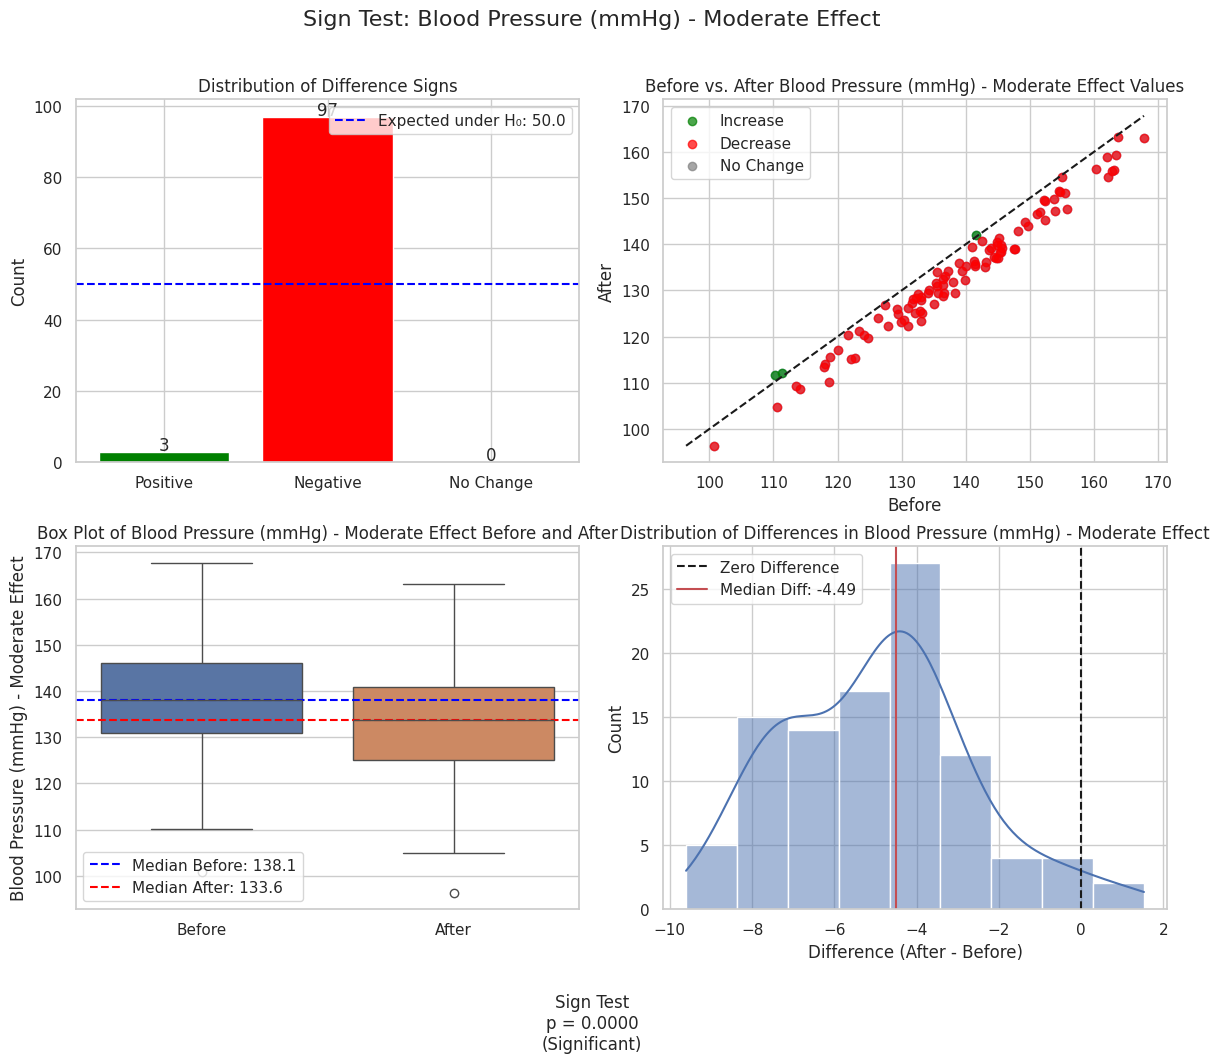


=== Scenario 2: Small Treatment Effect ===

Sign Test Results for Blood Pressure (mmHg) - Small Effect:
  Number of positive differences: 32
  Number of negative differences: 68
  Number of zero differences: 0

Sign Test Statistics:
  Before: Mean = 140.97, Median = 141.47
  After: Mean = 139.40, Median = 139.78
  Mean difference (After - Before): -1.57
  Median difference (After - Before): -1.68
  Proportion of positive differences: 0.3200
  p-value: 0.0004
  Effect size (Cohen's g): 0.3600 (large effect)
  Result: Statistically significant decrease in Blood Pressure (mmHg) - Small Effect


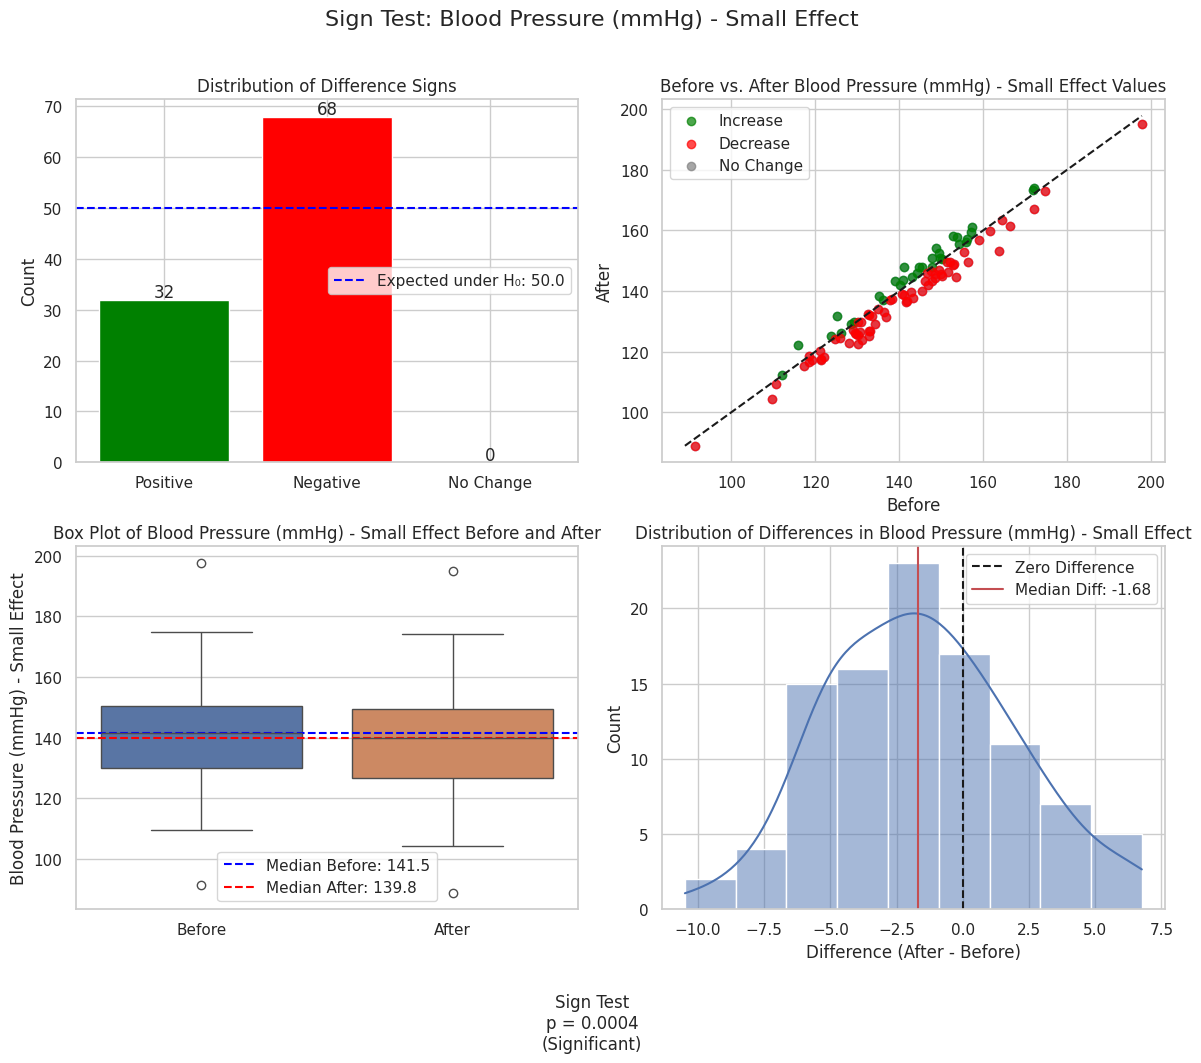

In [20]:
# Apply the sign test to the same simulated blood pressure data
print("\n\nSign Test with Simulated Blood Pressure Data:")

# Scenario 1: Moderate effect
print("\n=== Scenario 1: Moderate Treatment Effect ===")
bp_sign_results1 = perform_sign_test(bp_before1, bp_after1, 'blood_pressure', 'Blood Pressure (mmHg) - Moderate Effect')

# Scenario 2: Small effect
print("\n=== Scenario 2: Small Treatment Effect ===")
bp_sign_results2 = perform_sign_test(bp_before2, bp_after2, 'blood_pressure', 'Blood Pressure (mmHg) - Small Effect')

#Comparing Parametric and Non-parametric Results

Independent t-test vs. Mann-Whitney U test:

In [21]:
def compare_parametric_nonparametric(var_name, display_name=None):

    if display_name is None:
        display_name = var_name

    print(f"\nComparing Parametric and Non-parametric Tests for {display_name}:")

    # Split the data by heart disease status
    group1 = heart_data[heart_data['target'] == 1][var_name].dropna()
    group2 = heart_data[heart_data['target'] == 0][var_name].dropna()

    # Check normality assumption
    print("\nNormality Check:")
    shapiro1 = stats.shapiro(group1)
    shapiro2 = stats.shapiro(group2)
    print(f"  Disease group: Shapiro-Wilk p = {shapiro1.pvalue:.4f} ({'Normal' if shapiro1.pvalue > 0.05 else 'Non-normal'})")
    print(f"  No disease group: Shapiro-Wilk p = {shapiro2.pvalue:.4f} ({'Normal' if shapiro2.pvalue > 0.05 else 'Non-normal'})")

    # Check homogeneity of variance
    levene = stats.levene(group1, group2)
    print(f"\nHomogeneity of Variance:")
    print(f"  Levene's test p = {levene.pvalue:.4f} ({'Equal variances' if levene.pvalue > 0.05 else 'Unequal variances'})")

    # Perform independent t-test
    ttest = stats.ttest_ind(group1, group2, equal_var=(levene.pvalue > 0.05))

    # Calculate Cohen's d for t-test
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = group1.mean(), group2.mean()
    std1, std2 = group1.std(), group2.std()

    if levene.pvalue > 0.05:
        # Pooled standard deviation
        s_pooled = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
        d = abs(mean1 - mean2) / s_pooled
    else:
        # For Welch's t-test, use average standard deviation
        d = abs(mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)

    # Perform Mann-Whitney U test
    mwu = mannwhitneyu(group1, group2, alternative='two-sided')

    # Calculate effect size r for Mann-Whitney U test
    n_total = n1 + n2
    mean_u = (n1 * n2) / 2
    std_u = np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
    z_score = (mwu.statistic - mean_u) / std_u
    r = abs(z_score) / np.sqrt(n_total)

    # Print results
    print("\nParametric Test (t-test):")
    print(f"  t = {ttest.statistic:.4f}, p = {ttest.pvalue:.6f}")
    print(f"  Effect size (Cohen's d) = {d:.4f}")
    print(f"  Result: {'Significant' if ttest.pvalue < 0.05 else 'Not significant'}")

    print("\nNon-parametric Test (Mann-Whitney U):")
    print(f"  U = {mwu.statistic:.4f}, p = {mwu.pvalue:.6f}")
    print(f"  Effect size (r) = {r:.4f}")
    print(f"  Result: {'Significant' if mwu.pvalue < 0.05 else 'Not significant'}")

    # Compare results
    print("\nComparison:")
    if (ttest.pvalue < 0.05) == (mwu.pvalue < 0.05):
        print("  Both tests lead to the same conclusion regarding statistical significance.")

        if abs(ttest.pvalue - mwu.pvalue) < 0.01:
            print("  The p-values are very similar.")
        elif ttest.pvalue < mwu.pvalue:
            print("  The t-test produced a smaller p-value (more significant result).")
        else:
            print("  The Mann-Whitney U test produced a smaller p-value (more significant result).")
    else:
        print("  The tests lead to DIFFERENT conclusions regarding statistical significance!")
        print("  This discrepancy often occurs when parametric assumptions are violated.")

        if shapiro1.pvalue < 0.05 or shapiro2.pvalue < 0.05:
            print("  Since the normality assumption is violated, the Mann-Whitney U test result is more reliable.")
        elif levene.pvalue < 0.05:
            print("  Since the equal variance assumption is violated, the t-test with Welch's correction or Mann-Whitney U test may be more appropriate.")

    # Return results for further analysis
    return {
        'ttest_statistic': ttest.statistic,
        'ttest_pvalue': ttest.pvalue,
        'cohens_d': d,
        'mwu_statistic': mwu.statistic,
        'mwu_pvalue': mwu.pvalue,
        'effect_size_r': r,
        'normality1': shapiro1.pvalue > 0.05,
        'normality2': shapiro2.pvalue > 0.05,
        'equal_variance': levene.pvalue > 0.05
    }

In [22]:
# Compare parametric and non-parametric test results for our key variables
print("\n\nComparing Parametric (t-test) and Non-parametric (Mann-Whitney U) Test Results:")

# Compare results for age
age_comparison = compare_parametric_nonparametric('age', 'Age (years)')

# Compare results for cholesterol
chol_comparison = compare_parametric_nonparametric('chol', 'Cholesterol (mg/dl)')

# Compare results for maximum heart rate
hr_comparison = compare_parametric_nonparametric('thalach', 'Maximum Heart Rate')

# Compare results for ST depression induced by exercise (oldpeak)
oldpeak_comparison = compare_parametric_nonparametric('oldpeak', 'ST Depression')



Comparing Parametric (t-test) and Non-parametric (Mann-Whitney U) Test Results:

Comparing Parametric and Non-parametric Tests for Age (years):

Normality Check:
  Disease group: Shapiro-Wilk p = 0.0023 (Non-normal)
  No disease group: Shapiro-Wilk p = 0.1320 (Normal)

Homogeneity of Variance:
  Levene's test p = 0.0052 (Unequal variances)

Parametric Test (t-test):
  t = 4.0303, p = 0.000071
  Effect size (Cohen's d) = 0.4612
  Result: Significant

Non-parametric Test (Mann-Whitney U):
  U = 14521.5000, p = 0.000039
  Effect size (r) = 0.2361
  Result: Significant

Comparison:
  Both tests lead to the same conclusion regarding statistical significance.
  The p-values are very similar.

Comparing Parametric and Non-parametric Tests for Cholesterol (mg/dl):

Normality Check:
  Disease group: Shapiro-Wilk p = 0.4026 (Normal)
  No disease group: Shapiro-Wilk p = 0.0000 (Non-normal)

Homogeneity of Variance:
  Levene's test p = 0.7032 (Equal variances)

Parametric Test (t-test):
  t = 1.

#Comparing paired



Comparing Paired Parametric and Non-parametric Test Results:

=== Scenario 1: Moderate Treatment Effect ===

Comparing Paired Tests for Blood Pressure (mmHg) - Moderate Effect:

Normality Check for Differences:
  Shapiro-Wilk p = 0.0853 (Normal)

Symmetry Check for Differences:
  Kolmogorov-Smirnov p = 0.0115 (Asymmetric)

Descriptive Statistics:
  Before: Mean = 138.44, Median = 138.10, SD = 13.62
  After: Mean = 133.50, Median = 133.60, SD = 13.50
  Mean difference = -4.95, Median difference = -4.49, SD of differences = 2.29

1. Parametric Test (Paired t-test):
  t = 21.6116, p = 0.000000
  Effect size (Cohen's d) = -2.1612
  Result: Significant

2. Non-parametric Test (Wilcoxon Signed-Rank Test):
  W = 14.0000, p = 0.000000
  Effect size (r) = 0.8634
  Result: Significant

3. Non-parametric Test (Sign Test):
  Positive differences = 3, Negative differences = 97, No change = 0
  p = 0.000000
  Effect size (g) = 0.9400
  Result: Significant

Comparison:
  All tests agree: The effect

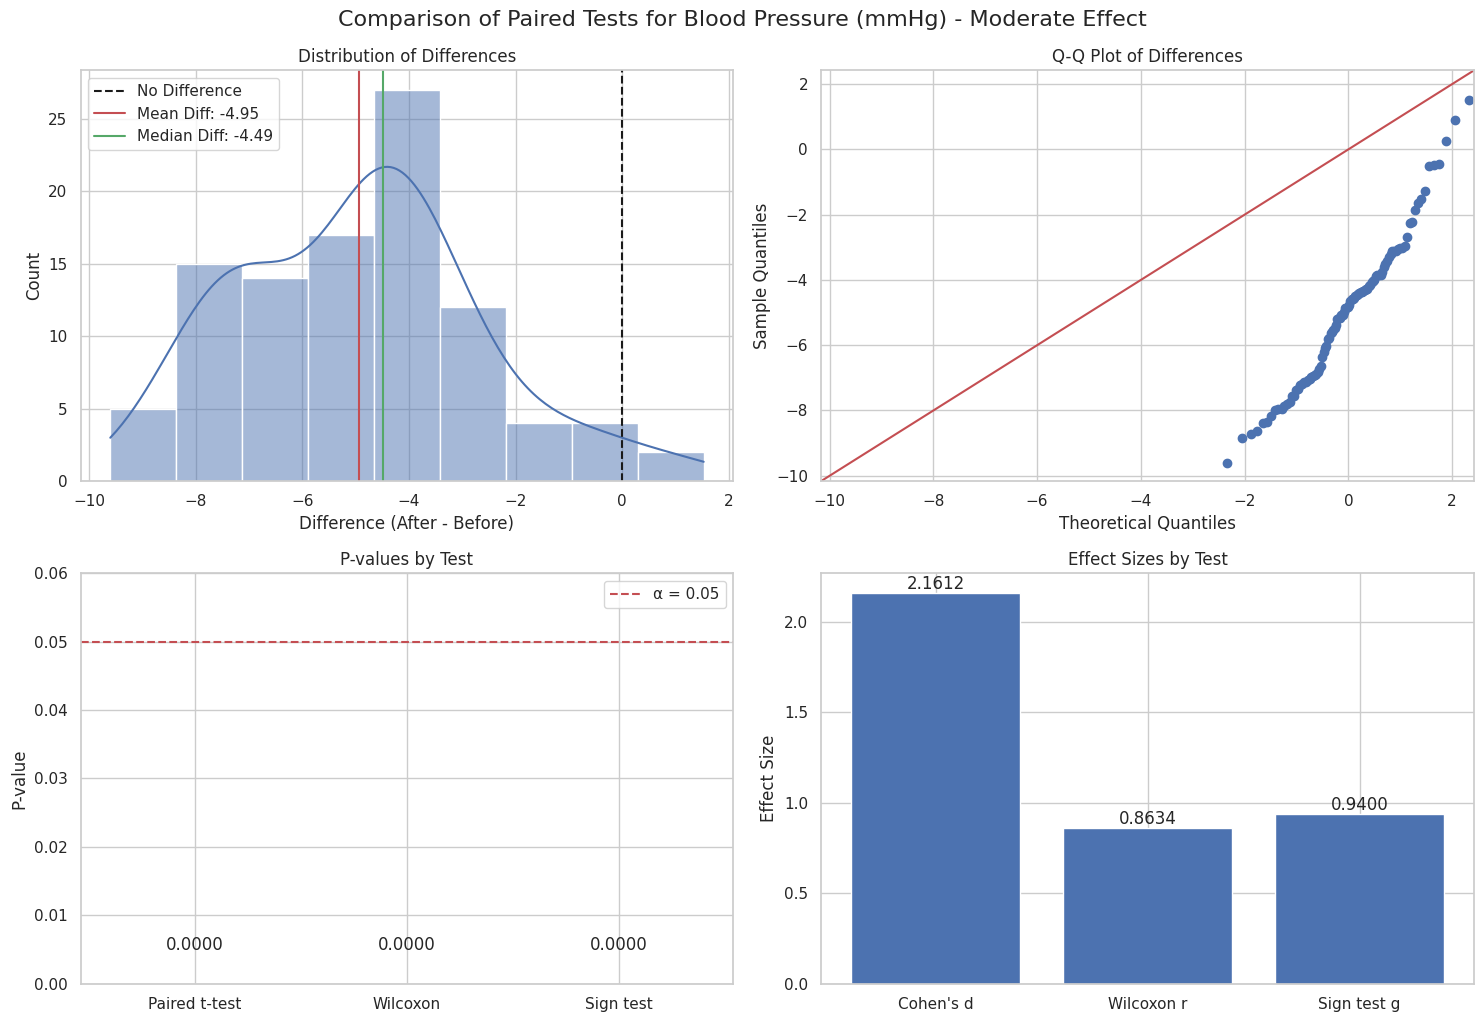


=== Scenario 2: Small Treatment Effect ===

Comparing Paired Tests for Blood Pressure (mmHg) - Small Effect:

Normality Check for Differences:
  Shapiro-Wilk p = 0.6578 (Normal)

Symmetry Check for Differences:
  Kolmogorov-Smirnov p = 0.5487 (Symmetric)

Descriptive Statistics:
  Before: Mean = 140.97, Median = 141.47, SD = 16.26
  After: Mean = 139.40, Median = 139.78, SD = 16.64
  Mean difference = -1.57, Median difference = -1.68, SD of differences = 3.54

1. Parametric Test (Paired t-test):
  t = 4.4470, p = 0.000023
  Effect size (Cohen's d) = -0.4447
  Result: Significant

2. Non-parametric Test (Wilcoxon Signed-Rank Test):
  W = 1327.0000, p = 0.000038
  Effect size (r) = 0.4119
  Result: Significant

3. Non-parametric Test (Sign Test):
  Positive differences = 32, Negative differences = 68, No change = 0
  p = 0.000409
  Effect size (g) = 0.3600
  Result: Significant

Comparison:
  All tests agree: The effect is significant.


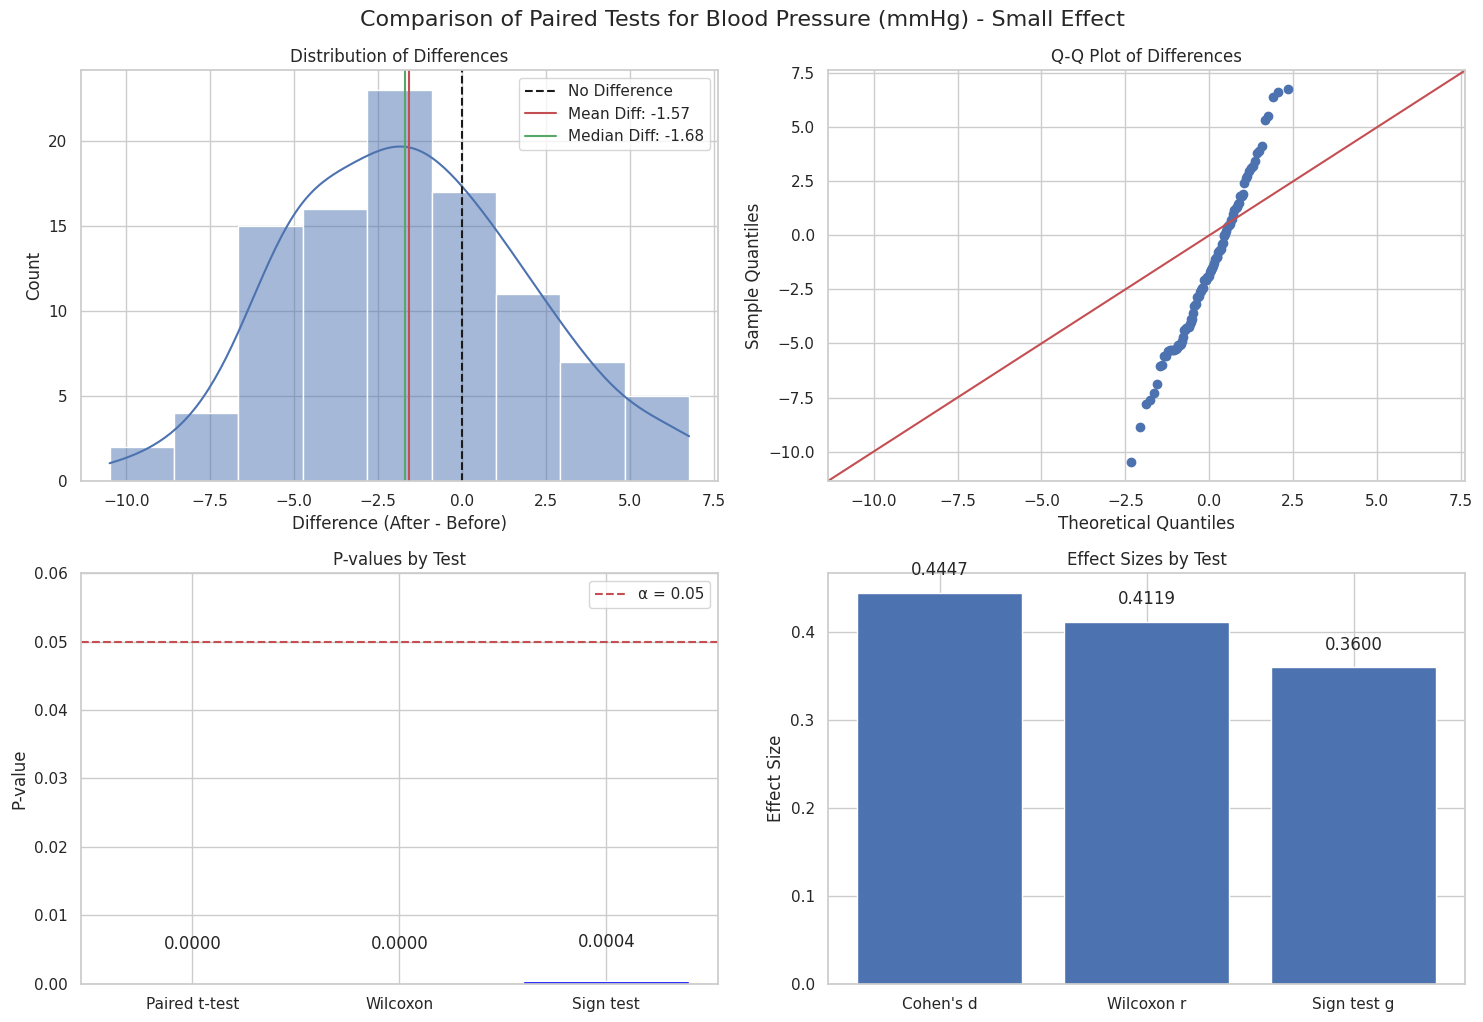

In [23]:
def compare_paired_tests(before_data, after_data, var_name, display_name=None):

    if display_name is None:
        display_name = var_name

    print(f"\nComparing Paired Tests for {display_name}:")

    # Calculate differences
    diff = after_data - before_data

    # Check normality of differences (key assumption for paired t-test)
    shapiro = stats.shapiro(diff)
    print("\nNormality Check for Differences:")
    print(f"  Shapiro-Wilk p = {shapiro.pvalue:.4f} ({'Normal' if shapiro.pvalue > 0.05 else 'Non-normal'})")

    # Check symmetry of differences (key assumption for Wilcoxon signed-rank test)
    median_diff = np.median(diff)
    distances = np.abs(diff - median_diff)
    above_median = distances[diff > median_diff]
    below_median = distances[diff < median_diff]

    if len(above_median) > 0 and len(below_median) > 0:
        ks = stats.ks_2samp(above_median, below_median)
        print("\nSymmetry Check for Differences:")
        print(f"  Kolmogorov-Smirnov p = {ks.pvalue:.4f} ({'Symmetric' if ks.pvalue > 0.05 else 'Asymmetric'})")
    else:
        print("\nCannot check symmetry: too many identical values.")

    # Calculate descriptive statistics
    n = len(before_data)
    mean_before, mean_after = np.mean(before_data), np.mean(after_data)
    median_before, median_after = np.median(before_data), np.median(after_data)
    std_before, std_after = np.std(before_data, ddof=1), np.std(after_data, ddof=1)
    mean_diff = mean_after - mean_before
    median_diff = median_after - median_before
    std_diff = np.std(diff, ddof=1)

    # 1. Paired t-test
    ttest = stats.ttest_rel(before_data, after_data)

    # Calculate Cohen's d for paired t-test
    d = mean_diff / std_diff

    # 2. Wilcoxon signed-rank test
    try:
        wilcoxon_result = stats.wilcoxon(before_data, after_data)

        # Calculate effect size r for Wilcoxon test
        non_zero_diff = diff[diff != 0]
        n_nonzero = len(non_zero_diff)
        z = (wilcoxon_result.statistic - (n_nonzero * (n_nonzero + 1)) / 4) / np.sqrt((n_nonzero * (n_nonzero + 1) * (2 * n_nonzero + 1)) / 24)
        wilcoxon_r = abs(z) / np.sqrt(n)
    except Exception as e:
        print(f"Error performing Wilcoxon test: {e}")
        wilcoxon_result = None
        wilcoxon_r = None

    # 3. Sign test
    pos_count = np.sum(diff > 0)
    neg_count = np.sum(diff < 0)
    zero_count = np.sum(diff == 0)
    n_nonzero = pos_count + neg_count

    if n_nonzero > 0:
        sign_test = binomtest(pos_count, n_nonzero, p=0.5)

        # Calculate effect size g for sign test
        proportion = pos_count / n_nonzero
        g = abs(proportion - 0.5) / 0.5
    else:
        sign_test = None
        g = None

    # Print results
    print("\nDescriptive Statistics:")
    print(f"  Before: Mean = {mean_before:.2f}, Median = {median_before:.2f}, SD = {std_before:.2f}")
    print(f"  After: Mean = {mean_after:.2f}, Median = {median_after:.2f}, SD = {std_after:.2f}")
    print(f"  Mean difference = {mean_diff:.2f}, Median difference = {median_diff:.2f}, SD of differences = {std_diff:.2f}")

    print("\n1. Parametric Test (Paired t-test):")
    print(f"  t = {ttest.statistic:.4f}, p = {ttest.pvalue:.6f}")
    print(f"  Effect size (Cohen's d) = {d:.4f}")
    print(f"  Result: {'Significant' if ttest.pvalue < 0.05 else 'Not significant'}")

    if wilcoxon_result is not None:
        print("\n2. Non-parametric Test (Wilcoxon Signed-Rank Test):")
        print(f"  W = {wilcoxon_result.statistic:.4f}, p = {wilcoxon_result.pvalue:.6f}")
        print(f"  Effect size (r) = {wilcoxon_r:.4f}")
        print(f"  Result: {'Significant' if wilcoxon_result.pvalue < 0.05 else 'Not significant'}")

    if sign_test is not None:
        print("\n3. Non-parametric Test (Sign Test):")
        print(f"  Positive differences = {pos_count}, Negative differences = {neg_count}, No change = {zero_count}")
        print(f"  p = {sign_test.pvalue:.6f}")
        print(f"  Effect size (g) = {g:.4f}")
        print(f"  Result: {'Significant' if sign_test.pvalue < 0.05 else 'Not significant'}")

    # Compare results
    print("\nComparison:")

    # Create a list of tests with valid results
    tests = []
    if ttest is not None:
        tests.append(('Paired t-test', ttest.pvalue < 0.05))
    if wilcoxon_result is not None:
        tests.append(('Wilcoxon test', wilcoxon_result.pvalue < 0.05))
    if sign_test is not None:
        tests.append(('Sign test', sign_test.pvalue < 0.05))

    # Check if all tests agree on significance
    all_agree = all(result == tests[0][1] for _, result in tests)

    if all_agree:
        print(f"  All tests agree: The effect is {'significant' if tests[0][1] else 'not significant'}.")
    else:
        print("  The tests disagree on statistical significance.")

        # List which tests found significance
        significant_tests = [name for name, result in tests if result]
        non_significant_tests = [name for name, result in tests if not result]

        if significant_tests:
            print(f"  Significant results from: {', '.join(significant_tests)}")
        if non_significant_tests:
            print(f"  Non-significant results from: {', '.join(non_significant_tests)}")

        if shapiro.pvalue < 0.05:
            print("  Since the normality assumption is violated, the non-parametric test results are more reliable.")
        else:
            print("  The differences appear normally distributed, so the paired t-test may be most appropriate.")

    # Create visualizations to compare the test results
    plt.figure(figsize=(15, 10))

    # 1. Histogram of differences with test results
    plt.subplot(2, 2, 1)
    sns.histplot(diff, kde=True)
    plt.axvline(0, color='k', linestyle='--', label='No Difference')
    plt.axvline(mean_diff, color='r', linestyle='-', label=f'Mean Diff: {mean_diff:.2f}')
    plt.axvline(median_diff, color='g', linestyle='-', label=f'Median Diff: {median_diff:.2f}')
    plt.title('Distribution of Differences')
    plt.xlabel('Difference (After - Before)')
    plt.legend()

    # 2. Q-Q plot of differences (normality check)
    plt.subplot(2, 2, 2)
    sm.qqplot(diff, line='45', ax=plt.gca())
    plt.title('Q-Q Plot of Differences')

    # 3. Bar chart comparing p-values
    plt.subplot(2, 2, 3)
    test_names = []
    p_values = []
    colors = []

    if ttest is not None:
        test_names.append('Paired t-test')
        p_values.append(ttest.pvalue)
        colors.append('blue' if ttest.pvalue < 0.05 else 'gray')

    if wilcoxon_result is not None:
        test_names.append('Wilcoxon')
        p_values.append(wilcoxon_result.pvalue)
        colors.append('blue' if wilcoxon_result.pvalue < 0.05 else 'gray')

    if sign_test is not None:
        test_names.append('Sign test')
        p_values.append(sign_test.pvalue)
        colors.append('blue' if sign_test.pvalue < 0.05 else 'gray')

    plt.bar(test_names, p_values, color=colors)
    plt.axhline(0.05, color='r', linestyle='--', label='α = 0.05')
    plt.title('P-values by Test')
    plt.ylabel('P-value')
    plt.ylim(0, max(max(p_values) + 0.01, 0.06))  # Set y-limit to show alpha line

    for i, p in enumerate(p_values):
        plt.text(i, p + 0.005, f'{p:.4f}', ha='center')

    plt.legend()

    # 4. Bar chart comparing effect sizes
    plt.subplot(2, 2, 4)
    effect_names = []
    effect_sizes = []

    if d is not None:
        effect_names.append("Cohen's d")
        effect_sizes.append(abs(d))

    if wilcoxon_r is not None:
        effect_names.append("Wilcoxon r")
        effect_sizes.append(wilcoxon_r)

    if g is not None:
        effect_names.append("Sign test g")
        effect_sizes.append(g)

    plt.bar(effect_names, effect_sizes)
    plt.title('Effect Sizes by Test')
    plt.ylabel('Effect Size')

    for i, e in enumerate(effect_sizes):
        plt.text(i, e + 0.02, f'{e:.4f}', ha='center')

    plt.tight_layout()
    plt.suptitle(f'Comparison of Paired Tests for {display_name}', fontsize=16, y=1.02)
    plt.show()

    # Return results for further analysis if needed
    return {
        'ttest_statistic': ttest.statistic if ttest is not None else None,
        'ttest_pvalue': ttest.pvalue if ttest is not None else None,
        'cohens_d': d,
        'wilcoxon_statistic': wilcoxon_result.statistic if wilcoxon_result is not None else None,
        'wilcoxon_pvalue': wilcoxon_result.pvalue if wilcoxon_result is not None else None,
        'effect_size_r': wilcoxon_r,
        'sign_test_pvalue': sign_test.pvalue if sign_test is not None else None,
        'effect_size_g': g,
        'normality': shapiro.pvalue > 0.05
    }

# Compare paired test results for our simulated blood pressure data
print("\n\nComparing Paired Parametric and Non-parametric Test Results:")

# Scenario 1: Moderate effect
print("\n=== Scenario 1: Moderate Treatment Effect ===")
moderate_comparison = compare_paired_tests(bp_before1, bp_after1, 'blood_pressure', 'Blood Pressure (mmHg) - Moderate Effect')

# Scenario 2: Small effect
print("\n=== Scenario 2: Small Treatment Effect ===")
small_comparison = compare_paired_tests(bp_before2, bp_after2, 'blood_pressure', 'Blood Pressure (mmHg) - Small Effect')